# **Kütüphaneler**


In [3]:
!pip install optuna

**Projede kullanılacak gerekli kütüphanelerin yüklenmesi.**

In [4]:
import optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from scipy.stats import randint
from sklearn.feature_selection import chi2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


# **Veri Okuma ve Genel Bilgiler**

In [5]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv')

**Pandas ile proje dosyasının dataframe kaydedilmesi.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

**Veri seti ile ilgili genel bilgiler. Kaç özellik olduğu ne kadar veri bulunduğu hangi veri türlerinin olduğu gibi.**

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns

categorical_columns_list = categorical_columns.tolist()
list = ['State', 'Sex', 'HadHeartAttack', 'SmokerStatus', 'AgeCategory', 'ECigaretteUsage', 'HadDiabetes', 'RemovedTeeth', 'GeneralHealth']

for item in list:
    if item in categorical_columns_list:
        categorical_columns_list.remove(item)

**Veride bulunan kategorik sütunları seçmek için yazdığım kod.**

In [8]:
print(categorical_columns_list)

['LastCheckupTime', 'PhysicalActivities', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan', 'RaceEthnicityCategory', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']


In [9]:
for column in categorical_columns:
    print(f"Sütun: {column}")
    print(df[column].value_counts())
    print()

Sütun: State
State
Washington              15000
Maryland                 9165
Minnesota                9161
Ohio                     8995
New York                 8923
Texas                    7408
Florida                  7315
Kansas                   6145
Wisconsin                6126
Maine                    6013
Iowa                     5672
Hawaii                   5596
Virginia                 5565
Indiana                  5502
South Carolina           5471
Massachusetts            5465
Arizona                  5462
Utah                     5373
Michigan                 5370
Colorado                 5159
Nebraska                 5107
California               5096
Connecticut              5053
Georgia                  4978
Vermont                  4845
South Dakota             4405
Montana                  4264
Missouri                 4195
New Jersey               3967
New Hampshire            3756
Puerto Rico              3589
Idaho                    3468
Alaska               

**Kategorik sütunlarda hangi değerlerin olduğunu incelemek için bir for döngüsüyle tüm sütunları gezip değerlerin frekanslarını çıkartırdım.**

In [10]:
df.describe()

PhysicalHealthDays  MentalHealthDays     SleepHours  HeightInMeters  \
count       246022.000000     246022.000000  246022.000000   246022.000000   
mean             4.119026          4.167140       7.021331        1.705150   
std              8.405844          8.102687       1.440681        0.106654   
min              0.000000          0.000000       1.000000        0.910000   
25%              0.000000          0.000000       6.000000        1.630000   
50%              0.000000          0.000000       7.000000        1.700000   
75%              3.000000          4.000000       8.000000        1.780000   
max             30.000000         30.000000      24.000000        2.410000   

       WeightInKilograms            BMI  
count      246022.000000  246022.000000  
mean           83.615179      28.668136  
std            21.323156       6.513973  
min            28.120000      12.020000  
25%            68.040000      24.270000  
50%            81.650000      27.460000  
75%            95.250000      31.890000  
max           292.570000      97.650000

**Sayısal sütunların özelliklerine bakmak için df.describe() fonksiyonunu kullandım.**

# **Veri Görselleştirme ve EDA**

## **Eksik Değerler**

In [11]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

**Veri setinde herhangi bir eksik değer bulunmuyor.**

## **Kategorik Değişkenlerin Hearth Disease Dağılımı**

**Burada tüm kategorik özelliklerin hedef özelliğimiz olan HadHeartAttack özelliği ile olan dağılımları görselleştirdim. Bunun matploblib ve seaborn kütüphanelerini kullandım. Seaborn kütüphanesinden countplot grafiğini kullandım tüm dağılımlar için.**

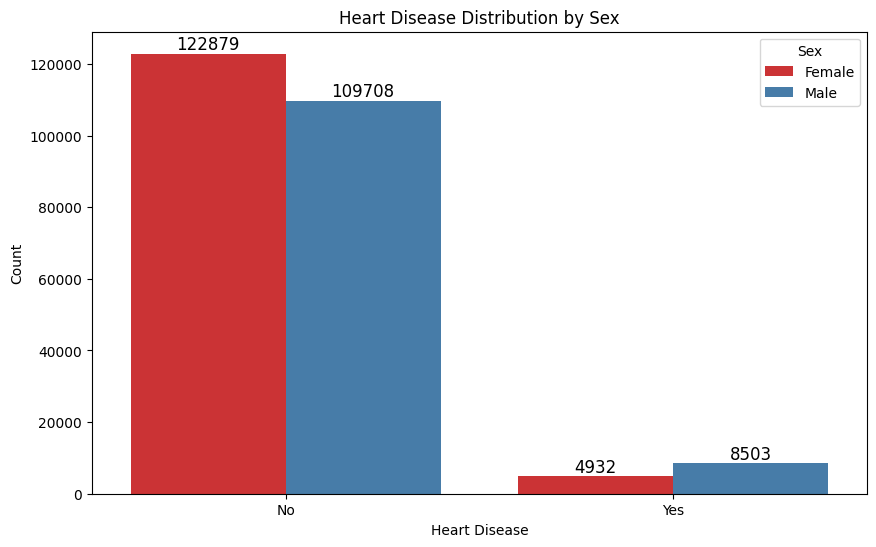

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HadHeartAttack', hue='Sex', palette='Set1')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('Heart Disease Distribution by Sex')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


**Erkelerin yüzdesi yaklaşık %7'si kadınların ise yaklaşık %4'ü kalp krizi geçirmiş.**

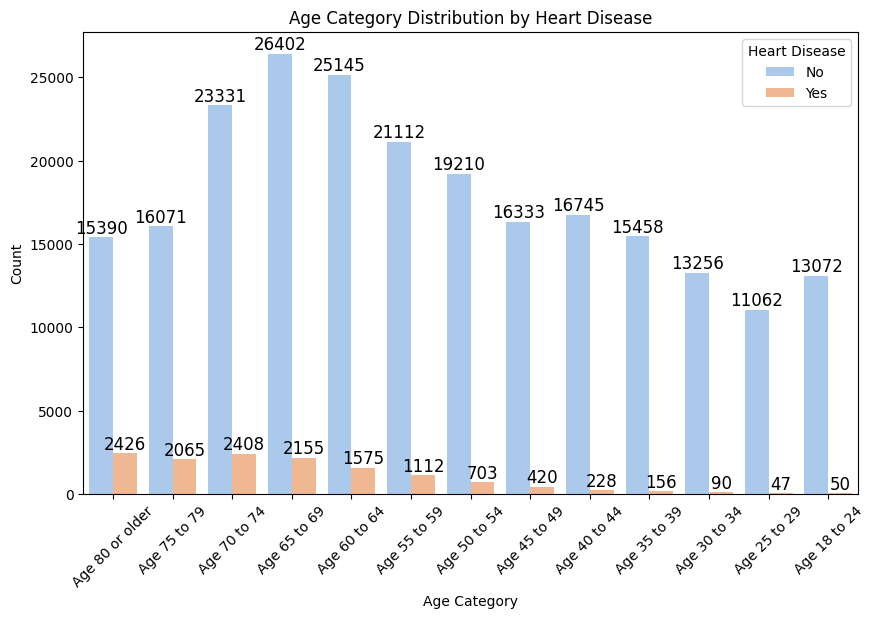

In [13]:
age_order = ['Age 80 or older', 'Age 75 to 79', 'Age 70 to 74', 'Age 65 to 69', 'Age 60 to 64', 'Age 55 to 59', 
             'Age 50 to 54', 'Age 45 to 49', 'Age 40 to 44', 'Age 35 to 39', 'Age 30 to 34', 'Age 25 to 29', 'Age 18 to 24']

plt.figure(figsize=(10, 6))
ax =sns.countplot(data=df, x='AgeCategory', hue='HadHeartAttack', palette='pastel', order=age_order)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')
plt.title('Age Category Distribution by Heart Disease')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()


**Bu grafik ile 55 yaş üstü kişilerin kalp krizi geçirme şansının daha fazla olduğunu gözlemliyoruz. Yaş azaldıkça kalp krizi geçiren sayısı genellikle azalmış.**

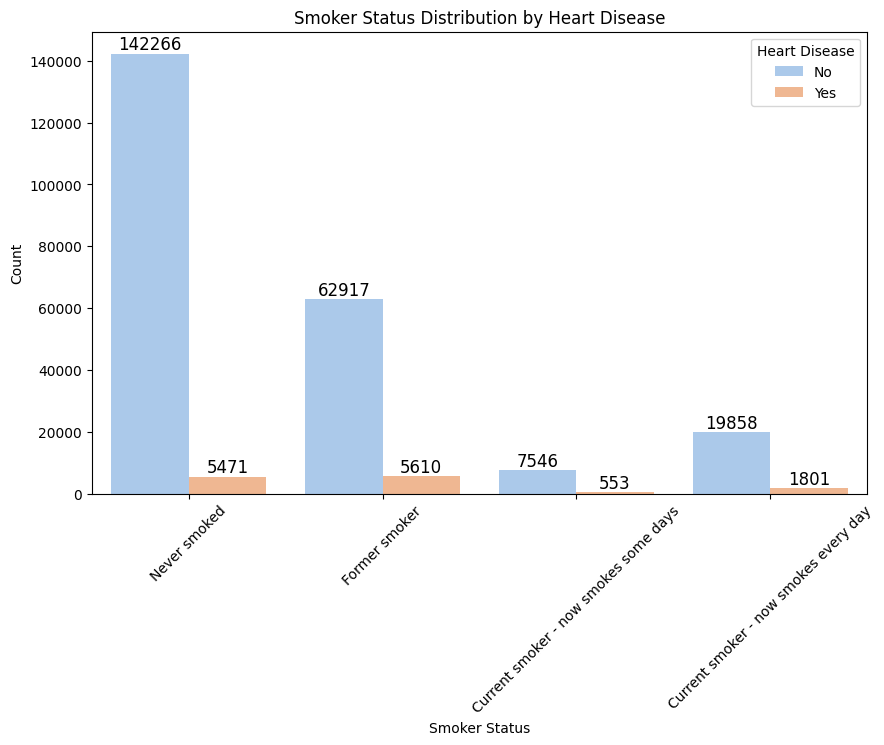

In [14]:
smoker_status_order = ['Never smoked', 'Former smoker', 'Current smoker - now smokes some days', 'Current smoker - now smokes every day']

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='SmokerStatus', hue='HadHeartAttack', palette='pastel', order=smoker_status_order)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')
    
plt.title('Smoker Status Distribution by Heart Disease')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

**Bu grafik ile sigara içenlerin kalp krizi geçirme oranının daha yüksek olduğunu gözlemliyoruz.**

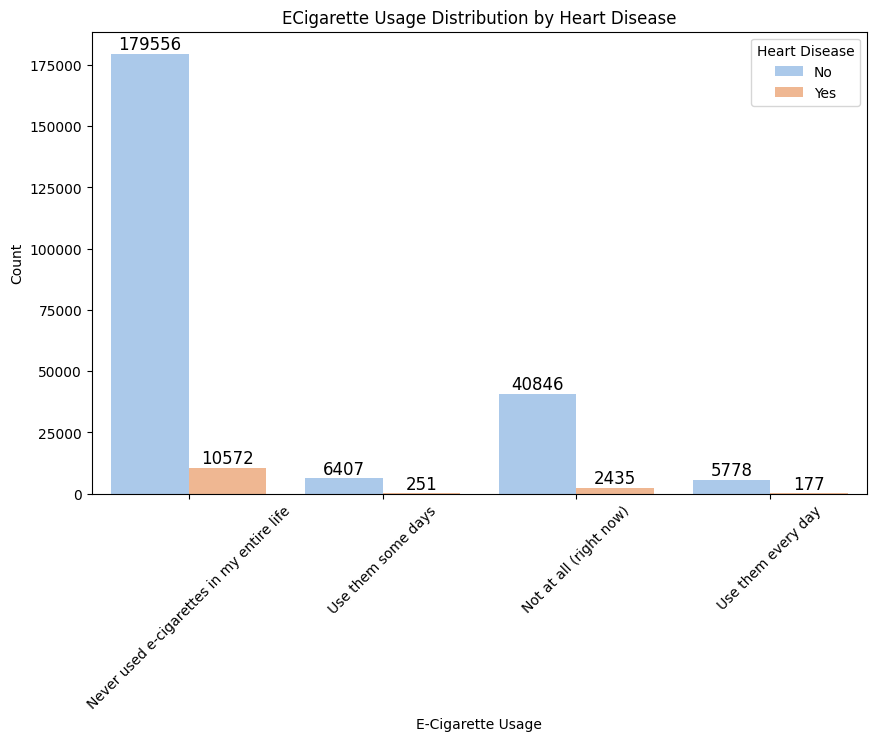

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='ECigaretteUsage', hue='HadHeartAttack', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('ECigarette Usage Distribution by Heart Disease')
plt.xlabel('E-Cigarette Usage')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

**Elektronik sigara kullanmanın kalp krizi geçirmede fazla bir etkisi olmadığını gözlemliyoruz bu garfik ile.**

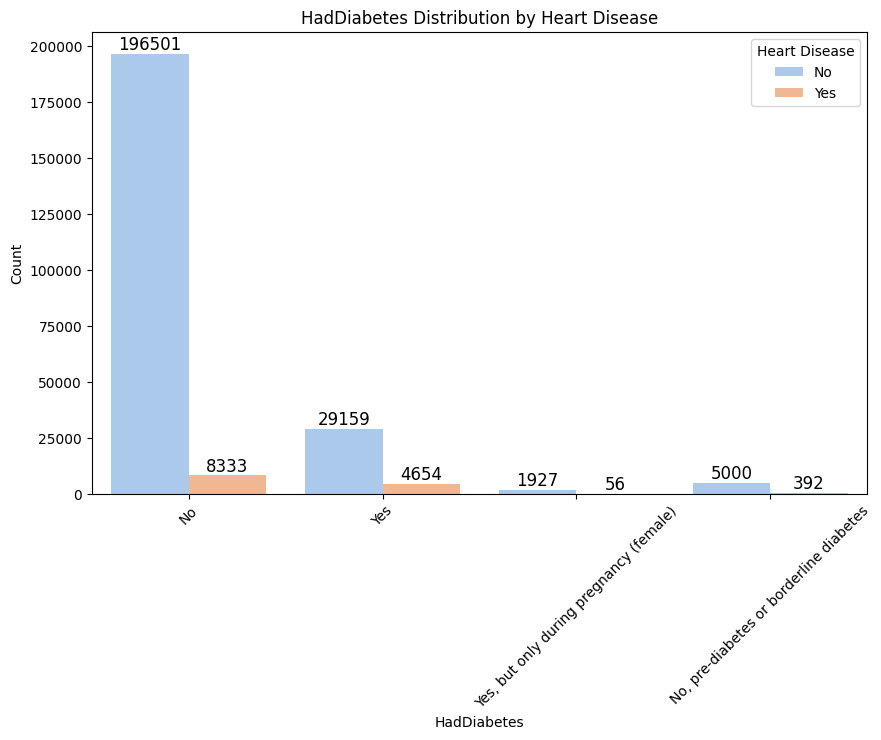

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='HadDiabetes', hue='HadHeartAttack', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('HadDiabetes Distribution by Heart Disease')
plt.xlabel('HadDiabetes')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

**Bu grafik ile diyabet hastalarının kalp krizi geçirme oranın daha fazla olduğunu görüyoruz.**

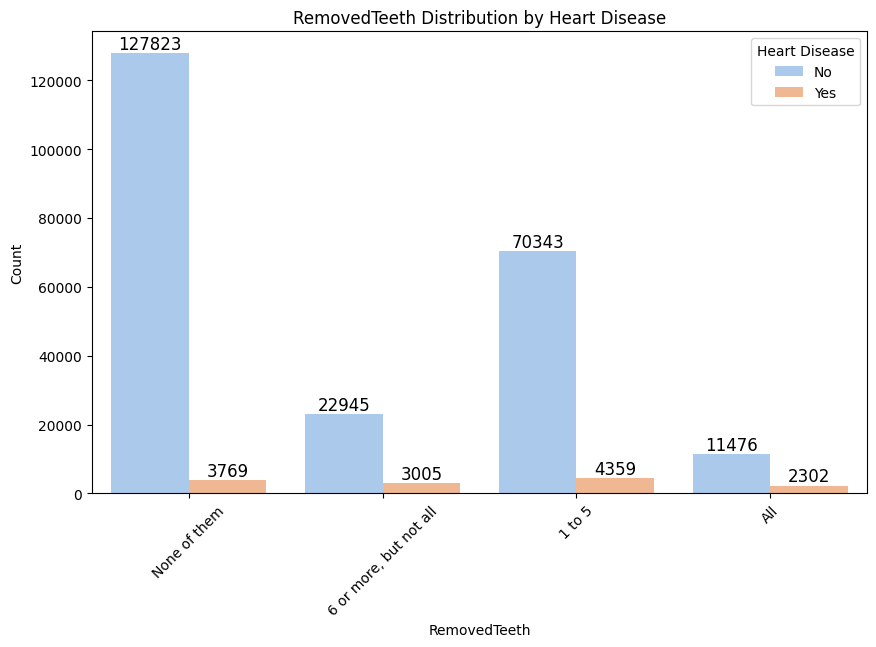

In [17]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='RemovedTeeth', hue='HadHeartAttack', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('RemovedTeeth Distribution by Heart Disease')
plt.xlabel('RemovedTeeth')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

**Kayıp diş sayısı arttıkça kalp krizi görülme oranının artığını gözlemliyoruz bu grafik ile.**

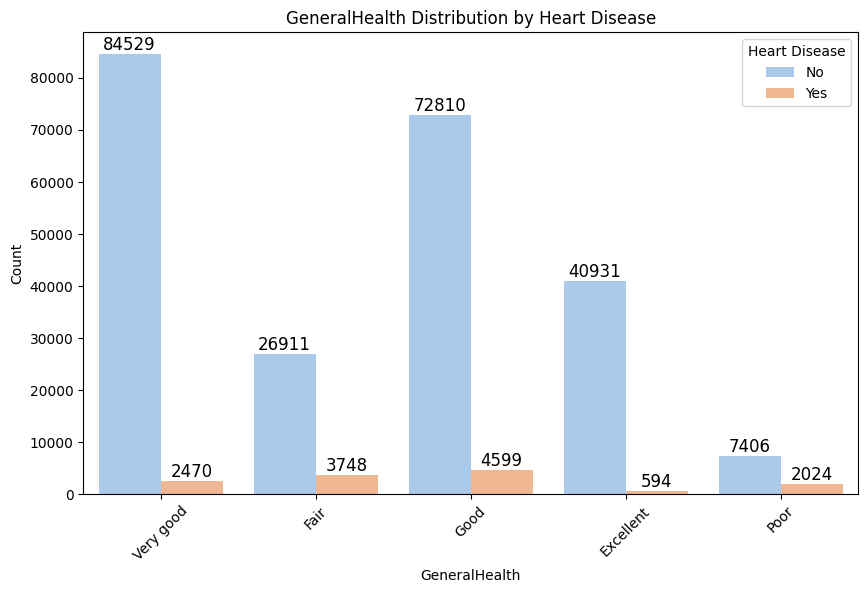

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='GeneralHealth', hue='HadHeartAttack', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('GeneralHealth Distribution by Heart Disease')
plt.xlabel('GeneralHealth')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.show()

**Grafikte genel sağlık durumu iyi olan kişilerin daha az sıklıkla kalp krizi geçirdiği görülmektedir. Genel sağlık durumu kötüleştikçe kalp krizi geçirme oranı artmaktadır.**

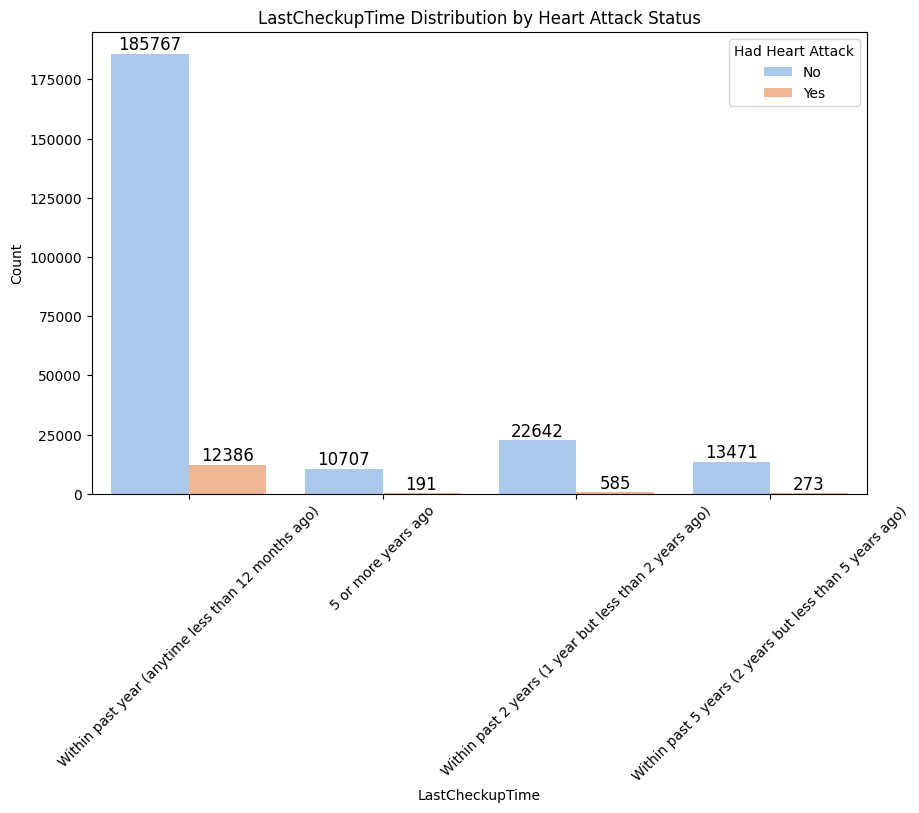

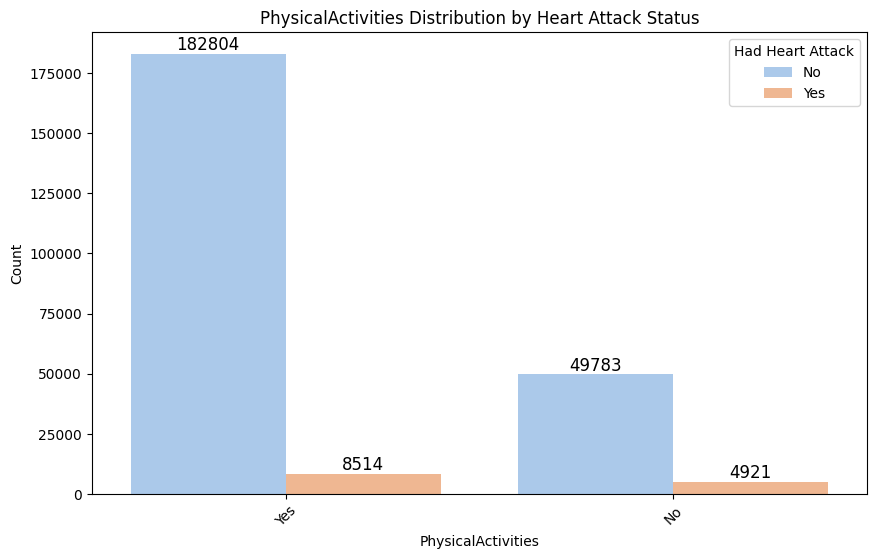

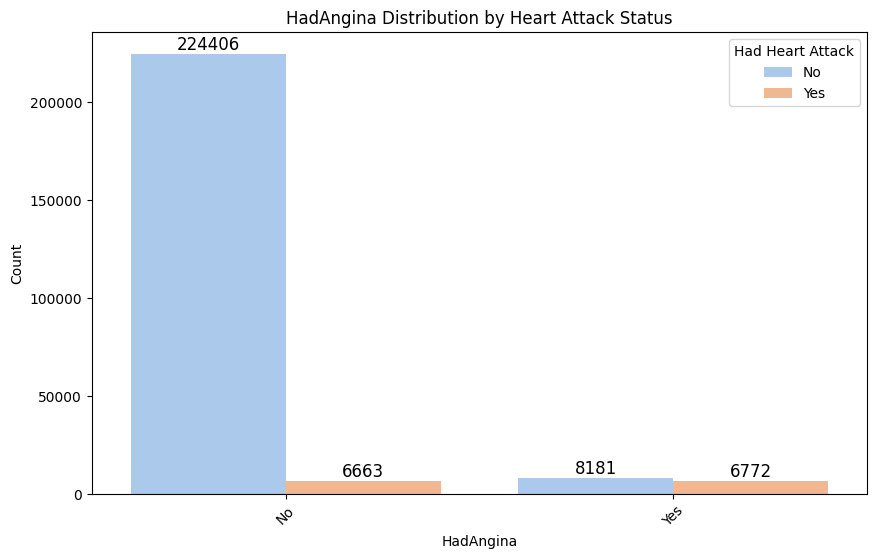

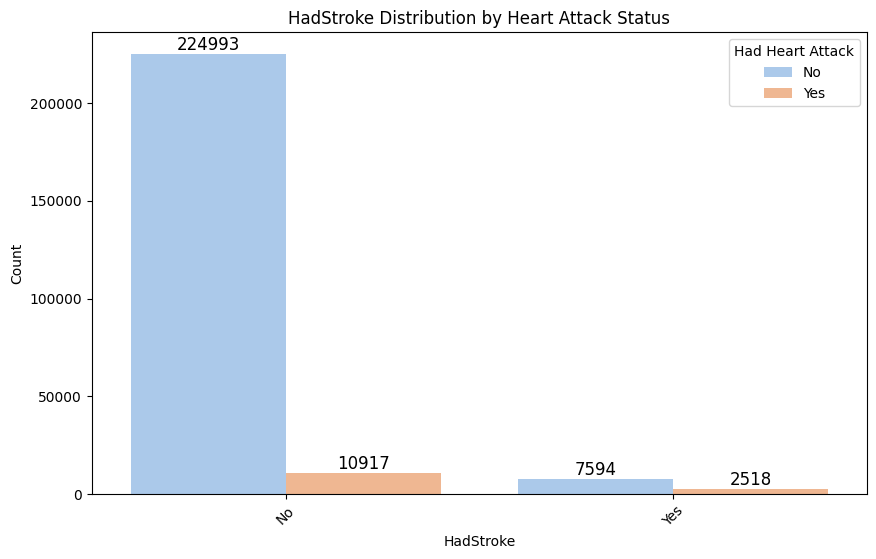

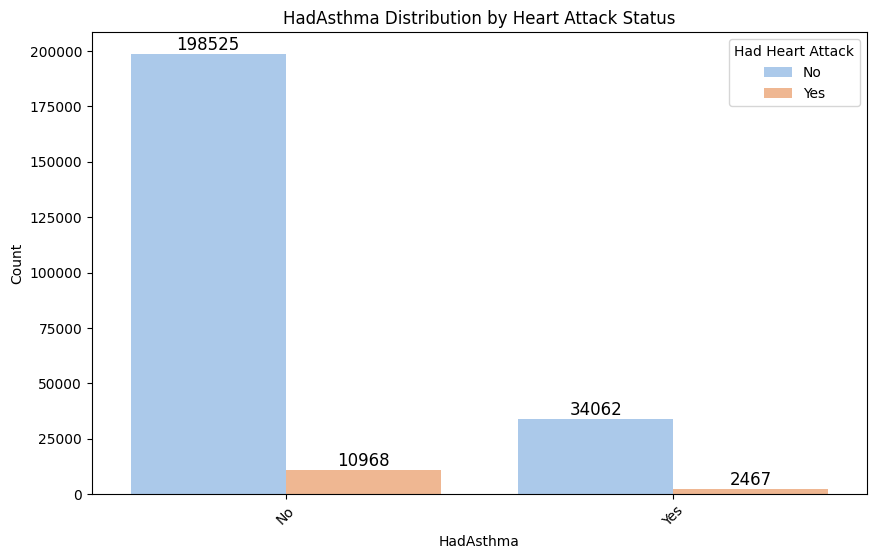

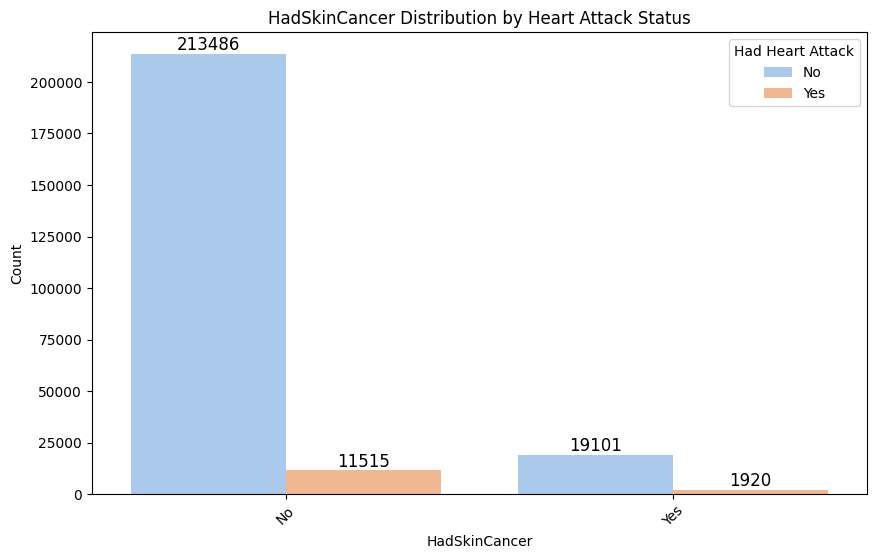

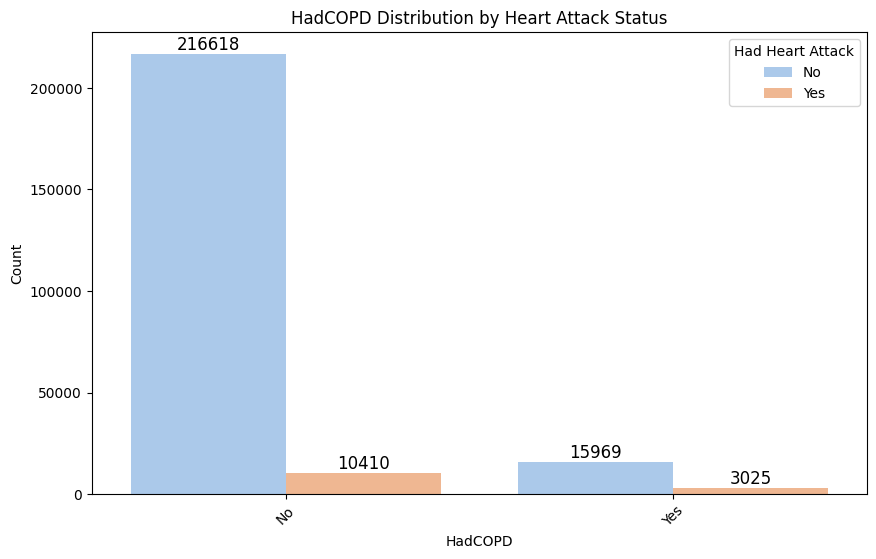

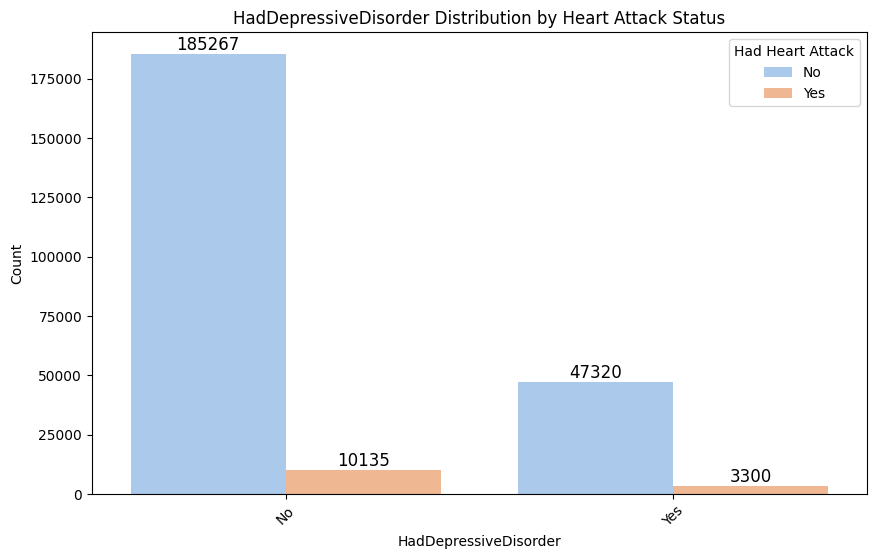

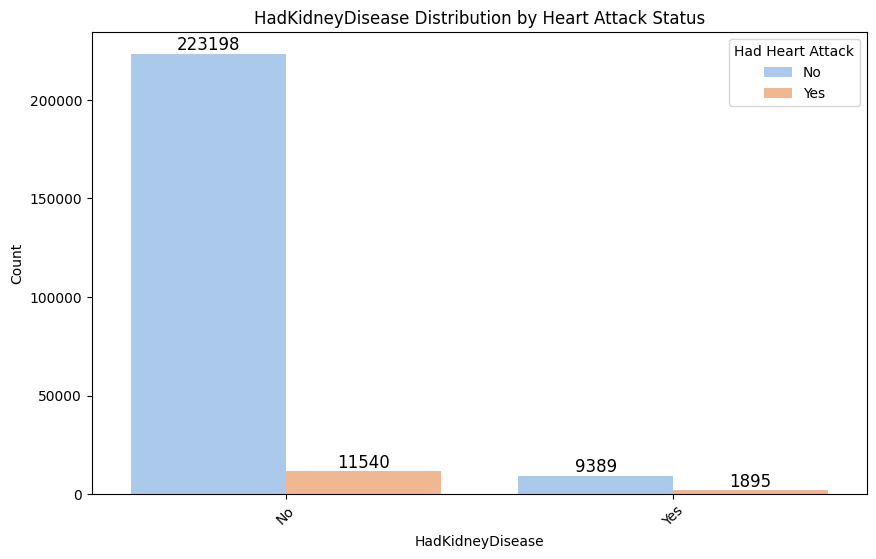

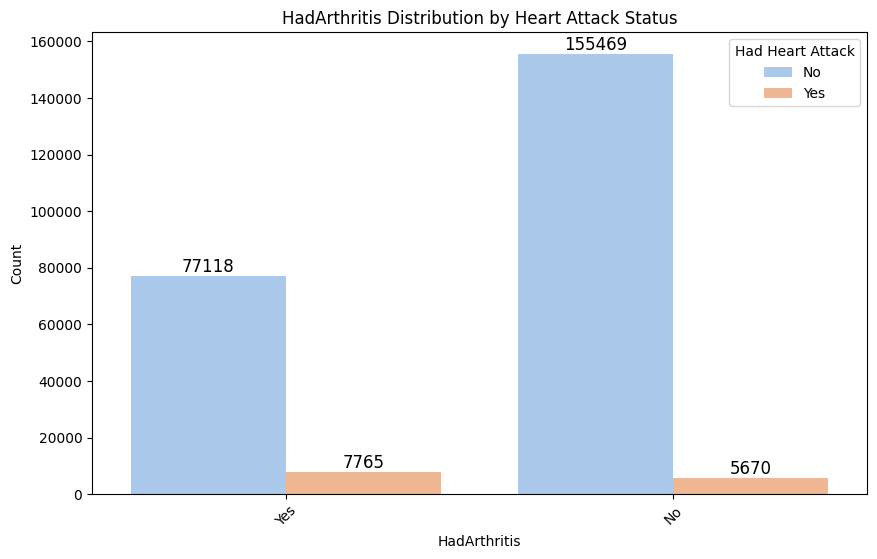

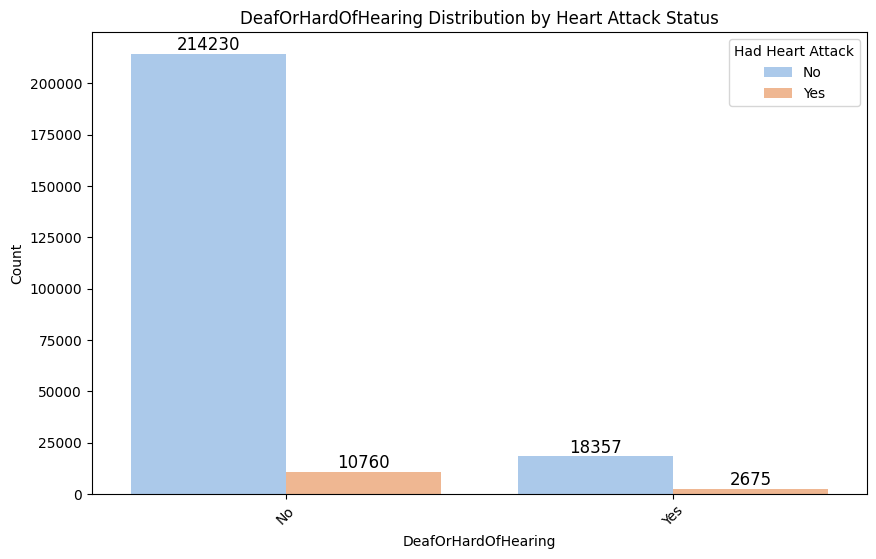

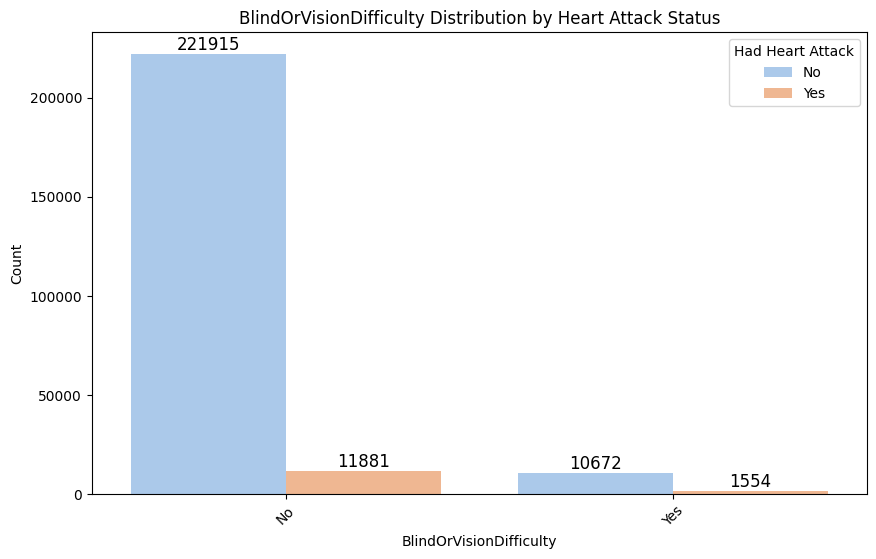

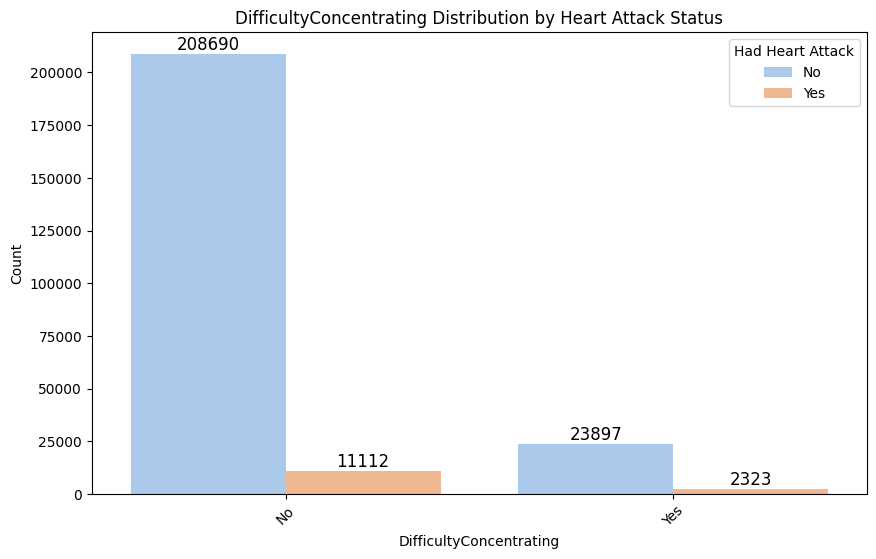

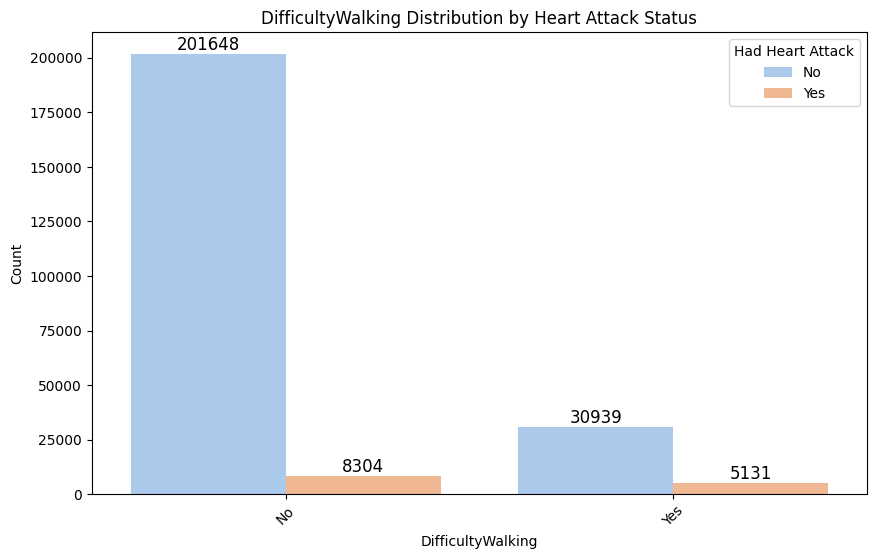

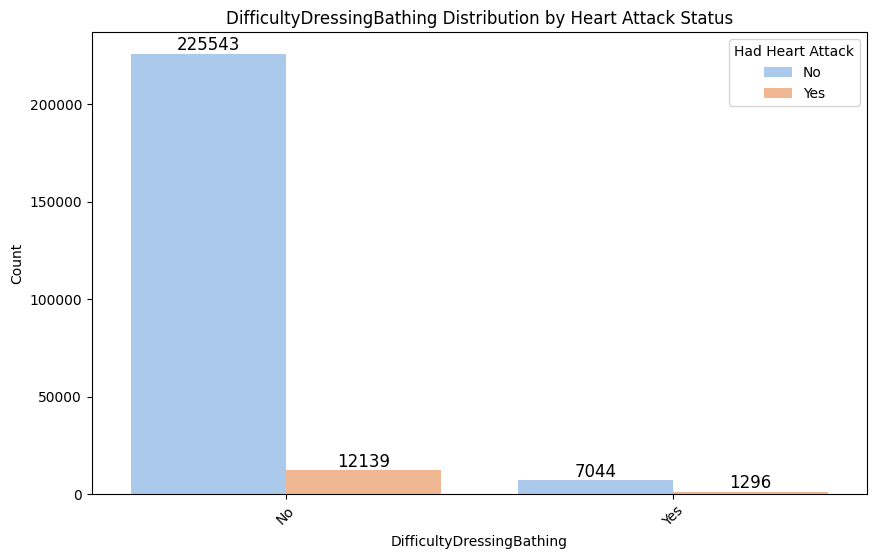

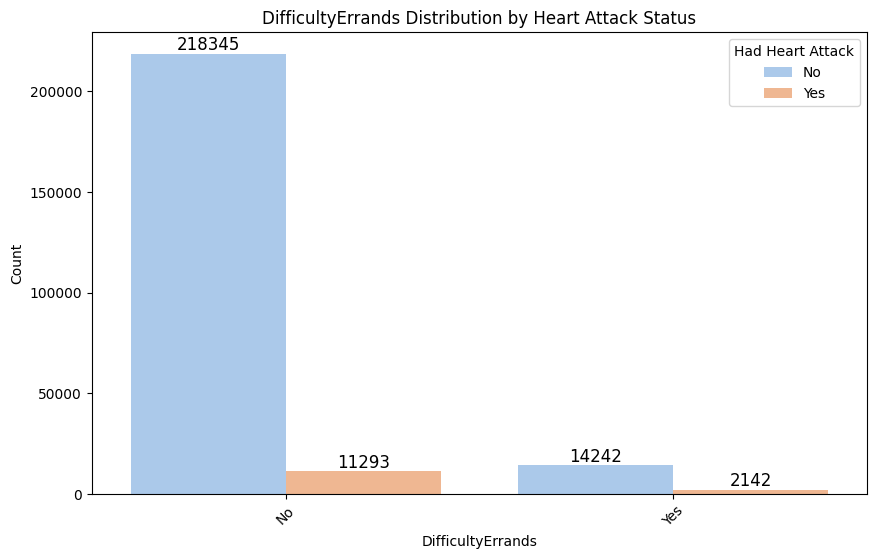

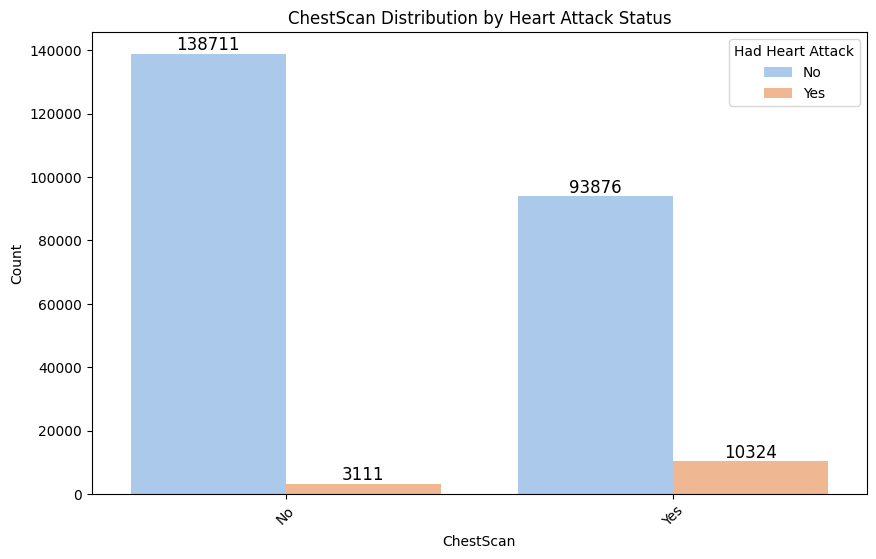

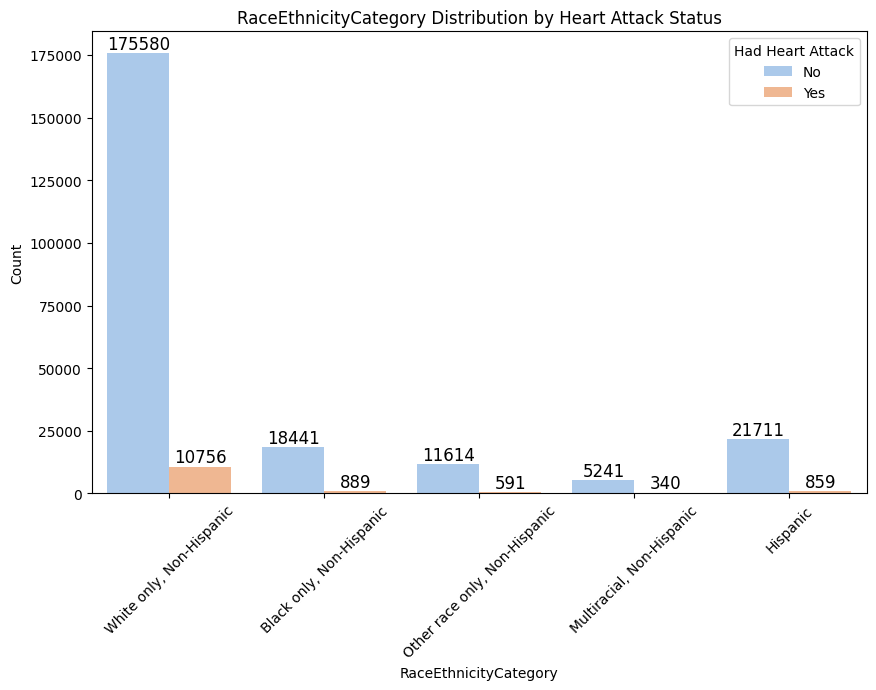

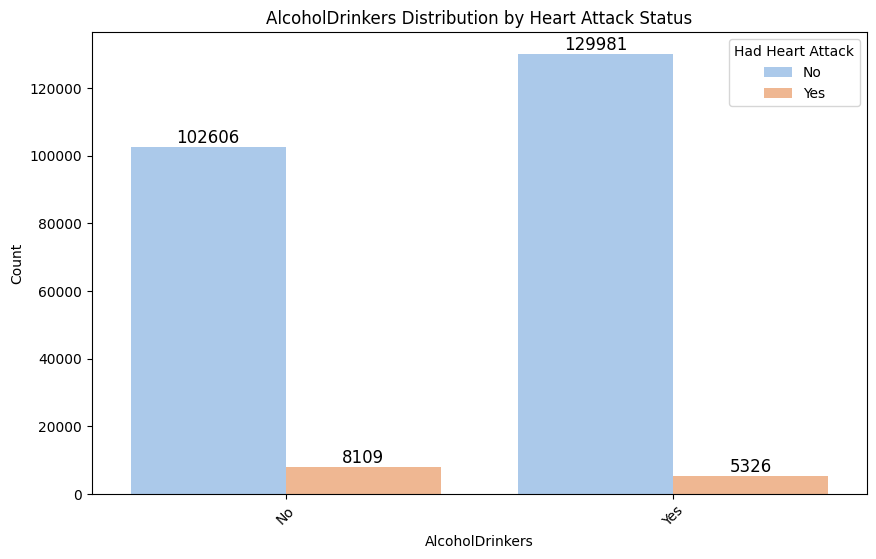

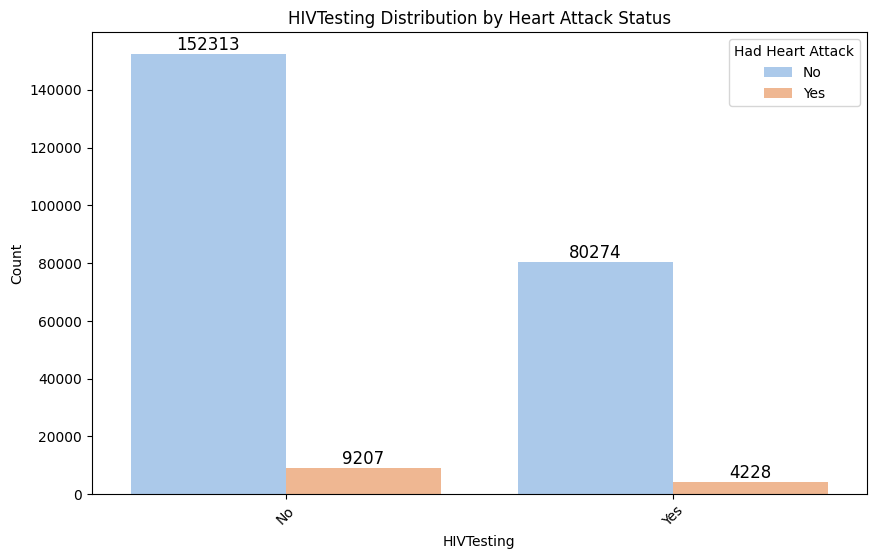

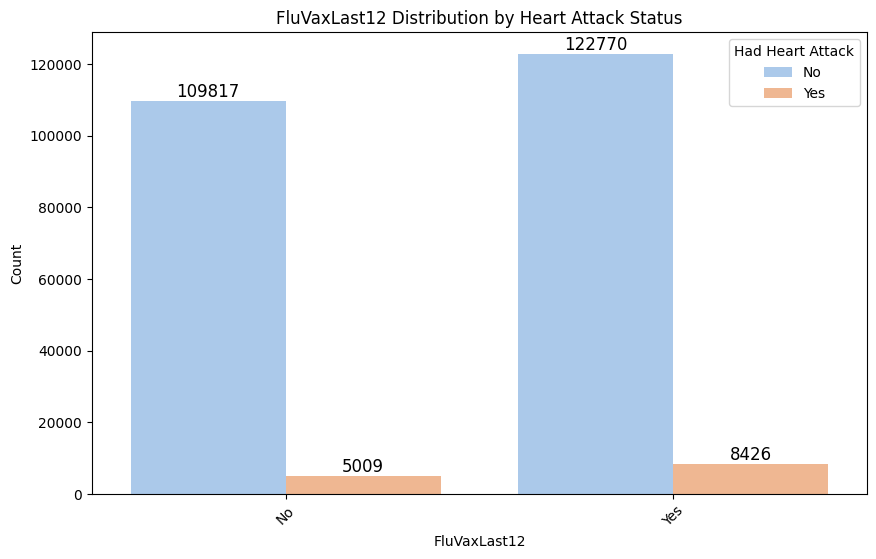

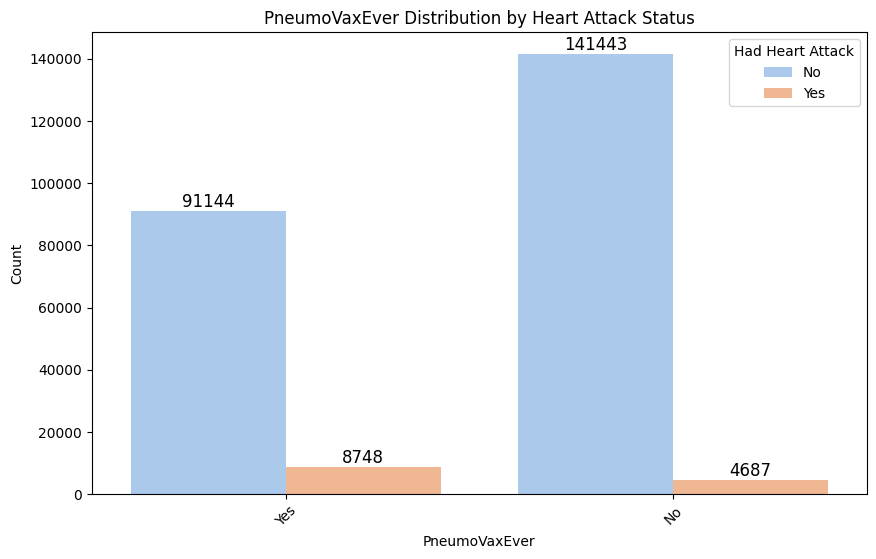

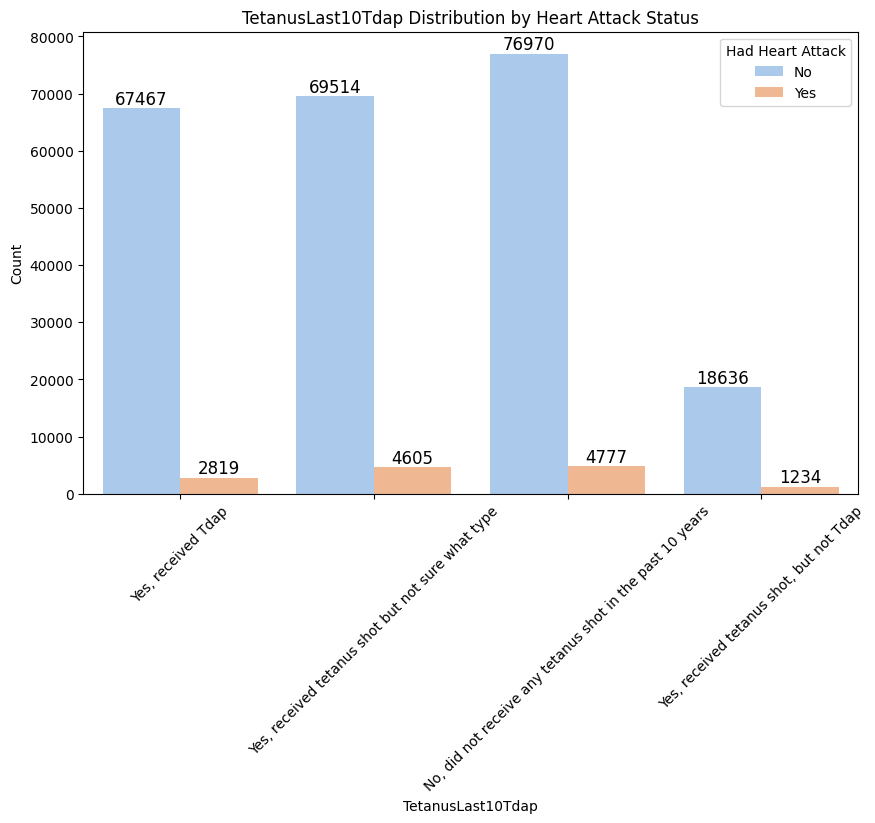

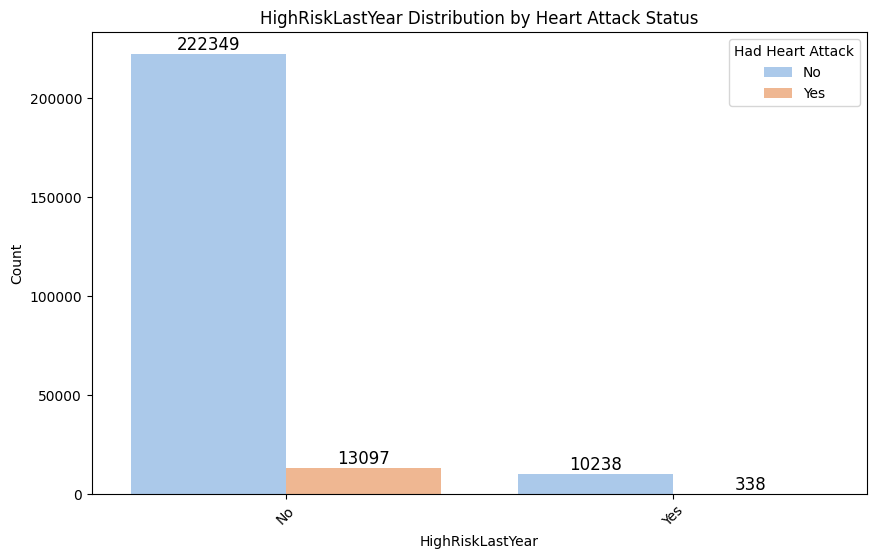

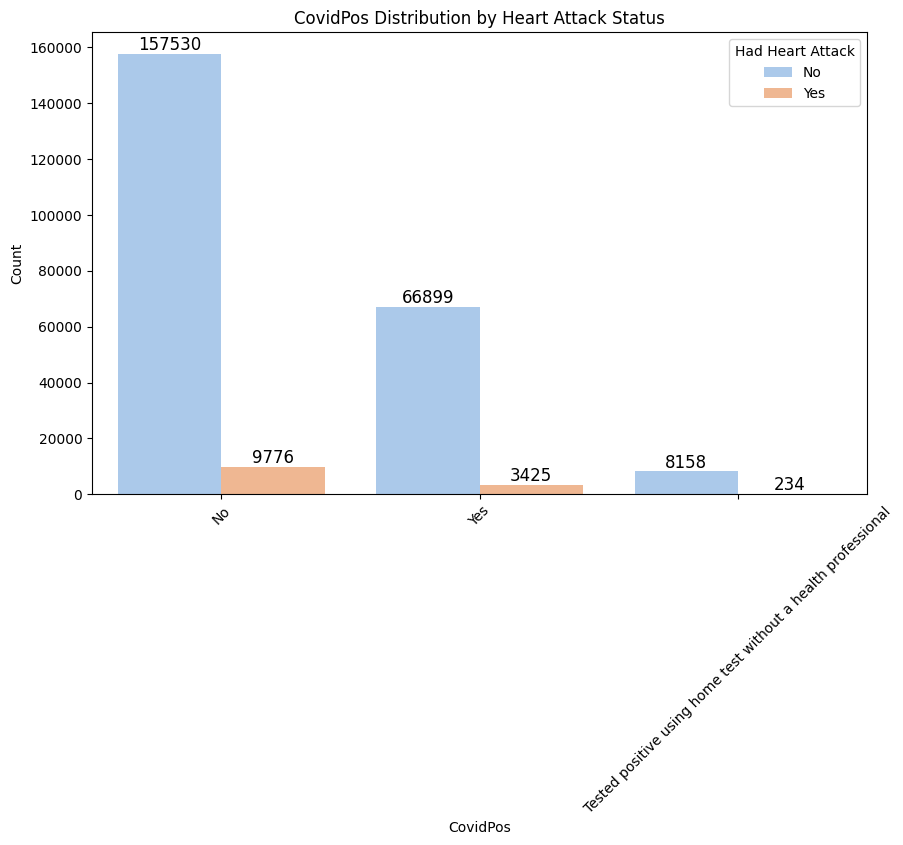

In [19]:
yes_no_order = ['No','Yes']

for column in categorical_columns_list:
    if column == 'FluVaxLast12':
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=column, hue='HadHeartAttack', palette='pastel',order=yes_no_order)
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=12, color='black')
        plt.title(f'{column} Distribution by Heart Attack Status')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Had Heart Attack')
        plt.xticks(rotation=45)
        plt.show()
    else:
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(data=df, x=column, hue='HadHeartAttack', palette='pastel')
        for container in ax.containers:
            ax.bar_label(container, label_type='edge', fontsize=12, color='black')
        plt.title(f'{column} Distribution by Heart Attack Status')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.legend(title='Had Heart Attack')
        plt.xticks(rotation=45)  
        plt.show()

**Buradaki grafikler ile tüm kategorik değişkenlerin kalp krizi geçirme durumu ile olan dağılımını gözlemliyoruz. Anjina hastalığı olanların yaklaşık olarak %45'nin kalp krizi geçirdiğini gözlemliyoruz.**

## **Sayısal Değişkenlerin Dağılımı**


**Burada tüm sayısal değişkenlerin kendi içindeki dağılımları inceliyoruz. Bunun yine matplotlib ve seaborn kütüphanelerinden faydalanıyoruz. Bu sefer histogram grafiğini kde ile kullandım. Kde (Kernel Density Estimate), bir veri dağılımının olasılık yoğunluk fonksiyonunu tahmin eden bir yöntemdir.**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


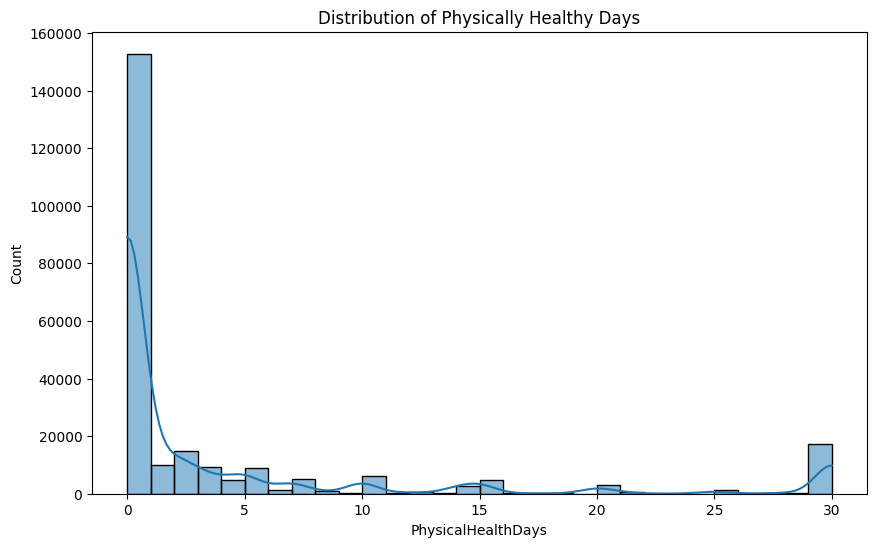

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


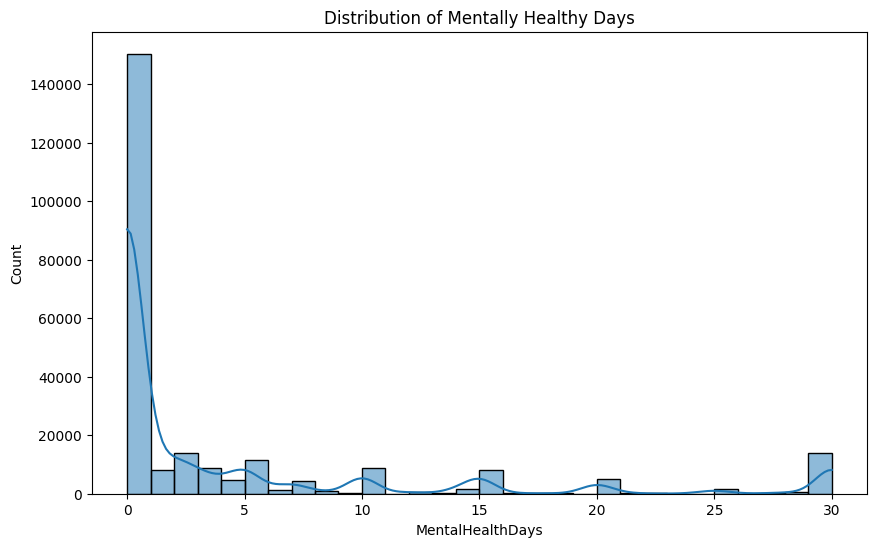

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


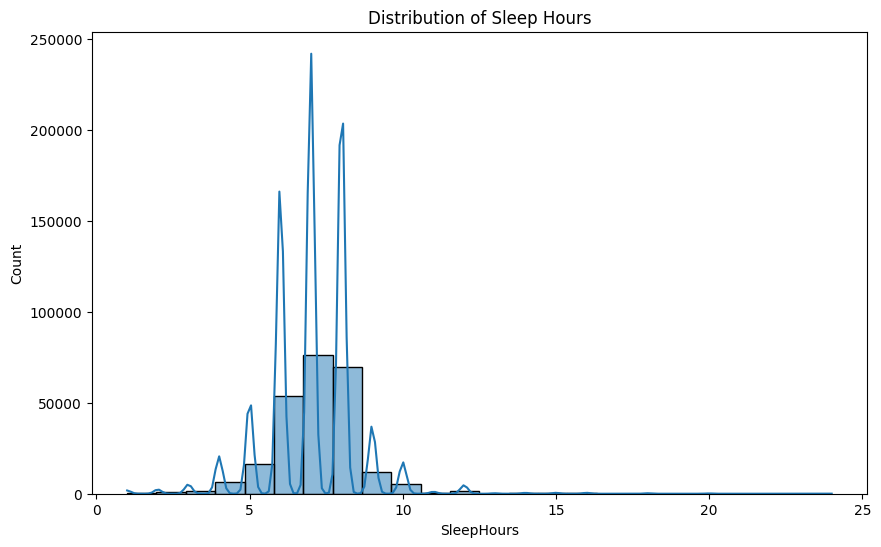

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


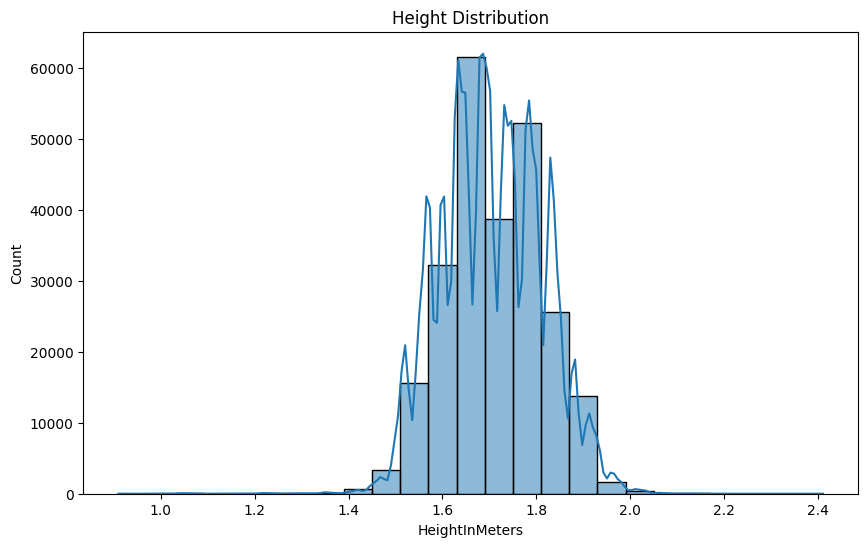

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


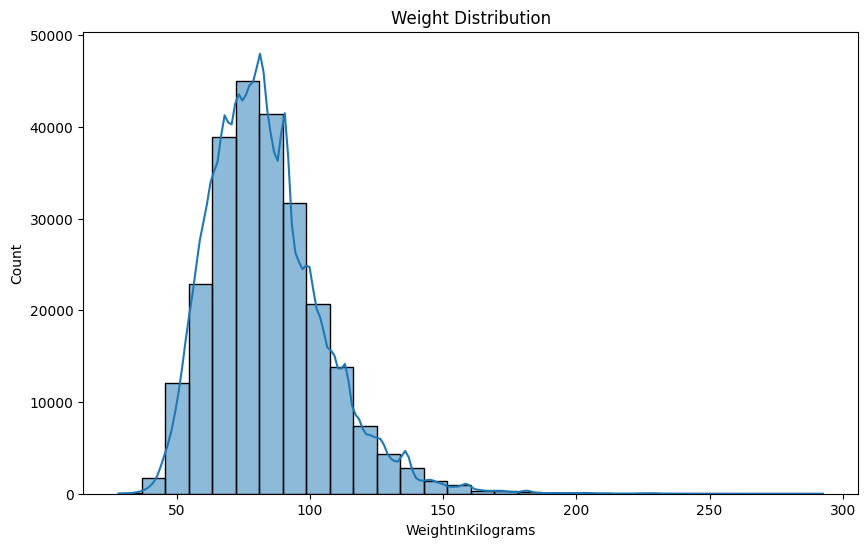

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


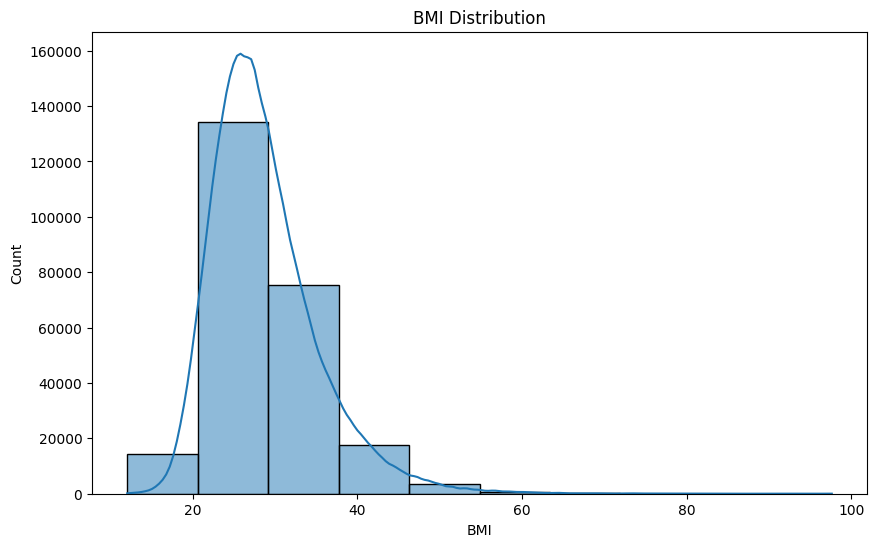

In [20]:
# Physical Health Days Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['PhysicalHealthDays'], kde=True, bins=30)
plt.title('Distribution of Physically Healthy Days')
plt.show()

# Mental Health Days Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['MentalHealthDays'], kde=True, bins=30)
plt.title('Distribution of Mentally Healthy Days')
plt.show()

# Sleep Hours Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['SleepHours'], kde=True, bins=24)
plt.title('Distribution of Sleep Hours')
plt.show()

# Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['HeightInMeters'], kde=True, bins=25)
plt.title('Height Distribution')
plt.show()

# Weight Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['WeightInKilograms'], kde=True, bins=30)
plt.title('Weight Distribution')
plt.show()

# BMI Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], kde=True, bins=10)
plt.title('BMI Distribution')
plt.show()

**Fiziksel ve zihinsel olarak sağlıklı olunan gün sayısı çoğunlukla 0 olarak girilmiş. Değerlerin dağılımı birbirine yakın gözüküyor.**

**Günlük uyku saati değerinin 6 ile 8 arasında yoğunlaşmasını bekleriz bu grafiktede onu gözlemleyebiliyoruz.** 

**Boy dağılımı 140 cm ile 240 cm arasından dağıldığını gözlemliyoruz. Değerlerin çoğunluğunun 160 cm ile 180 cm arası olduğunu gözlemliyoruz.**

**Kilo dağılımının genellikle 50 ile 150 arasında dağıldığını gözlemliyoruz. Değerlerin çoğunluğunun 70 kg ile 100 kg arası olduğun gözlemliyoruz.**

**BMI değerinin yaklaşık olarak 12 ile 100 arasında dağıldığını gözlemliyoruz. Değerlerin çoğu 20 ile 40 arasında yer almış.**

# Veri Ön İşleme


## Eksik Veriler

In [21]:
df.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

**Herhangi bir eksik değer olmadığı için eksik değerler ile ilgili herhangi bir işlem yapmıyorum.**


## **Aykırı Veri Analizi**

**Aşağıda aykırı verileri bulmak için bir fonksiyon yazdım. Fonksiyon içine değişken olarak bir dataframe ve threshold değeri alıyor, threshold için genellikle kullanılan 1.5 değerini varsayılan değer olarak fonksiyona verdim. Fonksiyon dataframe'i okuyup içinden sayısal sütunları seçiyor. Aykırı değerleri bulmak için IQR yöntemini kullanıyor. Sonuç olarakta her sütunda bulduğu aykırı değerlerin sayısını geri döndürüyor.**

In [22]:
def count_outliers(df, threshold=1.5):
    """
    DataFrame'deki her bir sütun için outlier sayısını hesaplar.
    
    Parametreler:
    df (pd.DataFrame): Veri DataFrame'i.
    threshold (float): IQR için 1.5, z-score için 3 genellikle kullanılır.
    
    Dönüş:
    pd.Series: Her sütundaki outlier sayısını gösteren bir Seri.
    """
    outlier_counts = {}

    for col in df.select_dtypes(include=[np.number]).columns:
            
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - threshold * IQR
            upper_bound = Q3 + threshold * IQR
            
            outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            outlier_counts[col] = outliers
    
    return pd.Series(outlier_counts)


**Aykırı değerlerin sayısı bulmak için bir fonksiyon yazdım. Aykırı değerleri bulmak için çeyrek(quantile) değerler bulunur.** 
1. **Q1 = %25,** 
1. **Q3 = %75,**
1. **IQR = Q3 - Q1** 
**Daha sonra alt sınır ve üst sınır hesaplanır.**
1. **Alt Sınır = Q1 - 1.5 * IQR**
1. **Üst Sınır = Q3 + 1.5 * IQR** 
**Bu sınırların dışında kalan değerler aykırı olarak kabul edilir.**



In [23]:
outlier_counts = count_outliers(df,threshold=1.5)
print(outlier_counts)

PhysicalHealthDays    38810
MentalHealthDays      32714
SleepHours             3488
HeightInMeters          830
WeightInKilograms      5940
BMI                    7563
dtype: int64


**Veri bulunan aykırı değerlerin sayısı.**

**Aykırı değerleri kutu grafiği kullanarak görselleştirdim.**

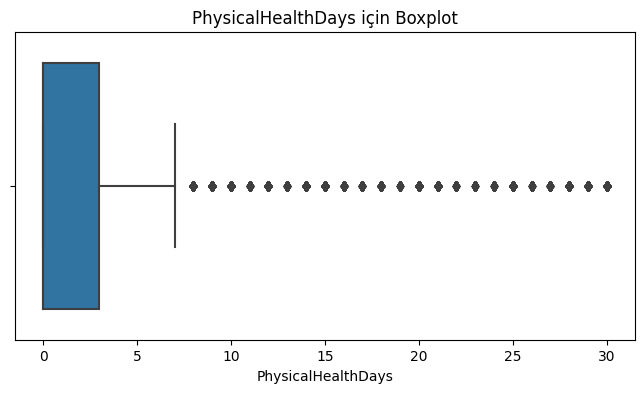

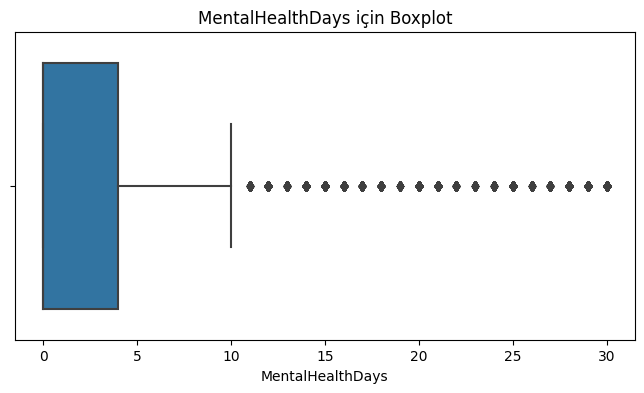

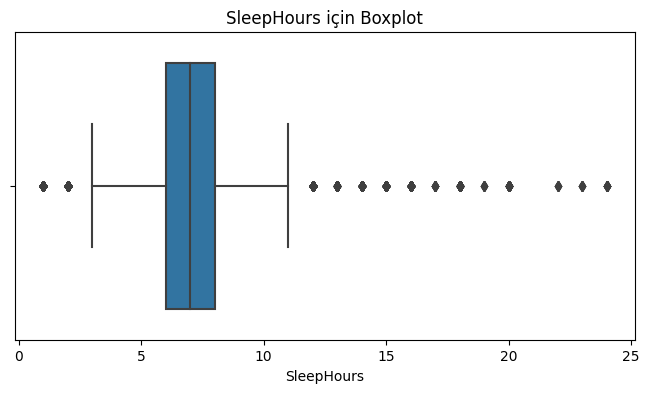

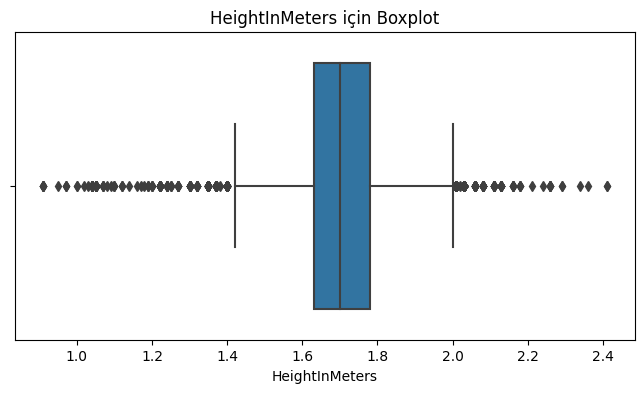

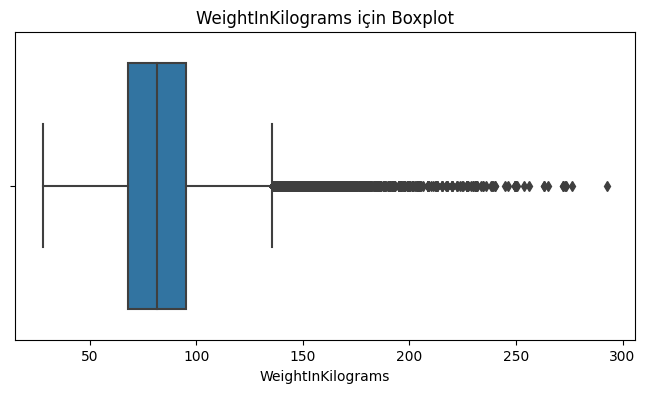

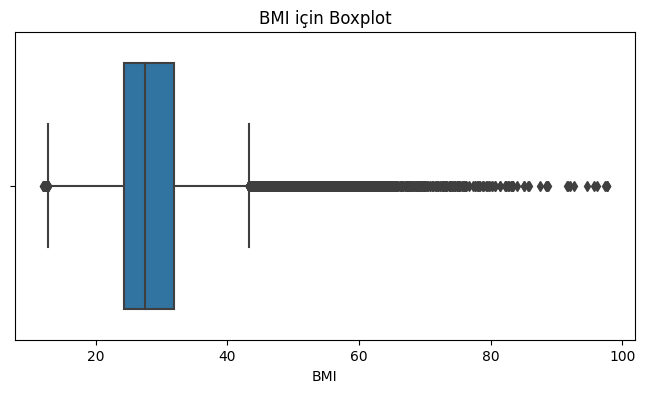

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'{col} için Boxplot')
    plt.show()

**Yukarıdakı kutu grafiklerinde de görüldüğü üzere her sayısal değer için veride aykırı değerler bulunuyor.**

**Aşağıdaki fonksiyon ile veride bulunan aykırı verileri düzeltmek için kullandım. Fonksiyon girdi olarak yine önceki aykırı değerleri bulmak için kullandığım fonksiyon ile aynı değerleri alıyor bir dataframe ve threshold değeri. Daha sonra okuduğu dataframe'i farklı bir dataframe kopyalayıp o dataframe üzerinde işlemleri gerçekleştiriyor. Öncelikle verideki aykırı değerleri buluyor daha sonra bulduğu değer alt sınırdan küçükse alt sınara eşitliyor veya üst sınırdan büyük isede üst sınara eşitliyor ve dataframe'i düzeltilmiş bir şekilde geri döndürüyor.**

In [25]:
def correct_outliers(df, threshold=1.5):
    """
    DataFrame'deki outlier değerlerini alt ve üst sınırlara çekerek düzeltir.
    
    Parametreler:
    df (pd.DataFrame): Veri DataFrame'i.
    threshold (float): IQR için 1.5, z-score için 3 genellikle kullanılır.
    
    Dönüş:
    pd.DataFrame: Outlier'ları düzeltilmiş DataFrame.
    """
    df_corrected = df.copy()
    
    for col in df_corrected.select_dtypes(include=[np.number]).columns:
        Q1 = df_corrected[col].quantile(0.25)
        Q3 = df_corrected[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        
        # Alt sınırın altındaki değerleri alt sınıra çek
        df_corrected[col] = df_corrected[col].apply(lambda x: lower_bound if x < lower_bound else x)
        # Üst sınırın üstündeki değerleri üst sınıra çek
        df_corrected[col] = df_corrected[col].apply(lambda x: upper_bound if x > upper_bound else x)
    
    return df_corrected


**Bu fonksiyon ile alt sınırın altında kalan değerleri alt sınıra, üst sınırın üstündeki değerleri üst sınır ile değiştirerk outlier değerlerden kurtulmuş oluyoruz.**

In [26]:
df = correct_outliers(df,threshold=1.5)

In [27]:
print(count_outliers(df,threshold=1.5))

PhysicalHealthDays    0
MentalHealthDays      0
SleepHours            0
HeightInMeters        0
WeightInKilograms     0
BMI                   0
dtype: int64


**correct_outliers fonksiyonunu kullandıktan sonra yeniden aykırı değer var mı diye kontrol ediyorum.**

## **Kategori Encoding** 

**Kategorik değişkenleri LabelEncoder kullanarak sayısal değerler çevirme**

In [28]:
 def categorize_and_encode(data_column):
    le = LabelEncoder()

    encoded_column = le.fit_transform(data_column)

    return pd.Series(encoded_column, index=data_column.index)

**Bu fonksiyon ile dataframeden bir sütun alıp LabelEncoder kullanarak sütundaki verileri sayısal değişkenler olarak kodluyor.**

In [29]:
for col in categorical_columns:
    df[col] = categorize_and_encode(df[col])

**Fonksiyonu kullanmak için daha önceden oluşturduğum categorical_columns değişkenini kullandım. For döngüsü ile categorical_columns değişkenindeki tüm sütunları gezip encode ediyor ve tekrardan o sütuna kaydediyor veriyi.**

In [30]:
df.head()

State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0      0    0              4                 4.0               0.0   
1      0    1              4                 0.0               0.0   
2      0    1              4                 0.0               0.0   
3      0    0              1                 5.0               0.0   
4      0    0              2                 3.0              10.0   

   LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                3                   1         9.0             3   
1                3                   1         6.0             3   
2                3                   0         8.0             1   
3                3                   1         9.0             3   
4                3                   1         5.0             0   

   HadHeartAttack  ...  HeightInMeters  WeightInKilograms    BMI  \
0               0  ...            1.60              71.67  27.99   
1               0  ...            1.78              95.25  30.13   
2               0  ...            1.85             108.86  31.66   
3               0  ...            1.70              90.72  31.32   
4               0  ...            1.55              79.38  33.07   

   AlcoholDrinkers  HIVTesting  FluVaxLast12  PneumoVaxEver  \
0                0           0             1              1   
1                0           0             1              1   
2                1           0             0              1   
3                0           0             1              1   
4                0           0             1              1   

   TetanusLast10Tdap  HighRiskLastYear  CovidPos  
0                  1                 0         0  
1                  2                 0         0  
2                  0                 0         2  
3                  0                 0         2  
4                  0                 0         0  

[5 rows x 40 columns]

## **Korelasyon Matrisi**

**Verinin tamamını sayısal değerlere çevirdikten sonra korelasyon matrisine bakıyorum bunun için pandas kütüphanesinden corr() metodunu kullanıyorum. Daha sonra görselleştirmek için seaborn kütüphanesinden heatmapi kullandım. Değerlerin okunaklı olması için annot_kws içinde size değerini 6 yaptım.**

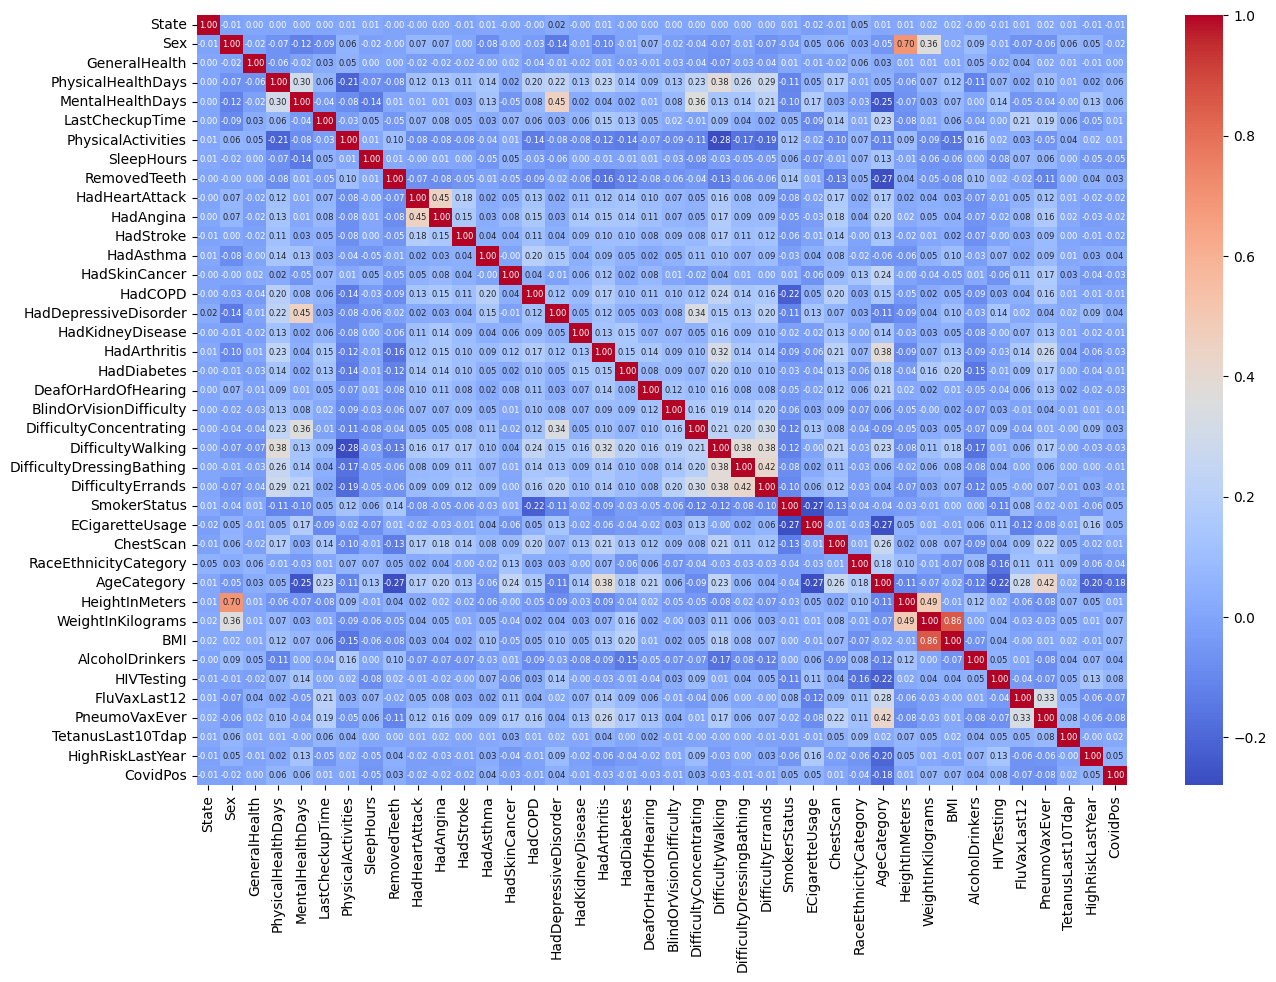

In [31]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 6}, ax=ax)

plt.show()

**Korelasyon matrisinde birbiri ile çok yüksek ilişkisi olan sütun özellikleri bulunmadığını gözlemliyoruz.**

## **Veri Ölçeklendirme**

In [32]:
scaler = MinMaxScaler(feature_range=(0, 1))

df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

**Veri ölçeklendirme için daha önceden grafiklerini çıkardığım sayısal sütunları kullandım sadece scaler olarak MinMaxScaler kullandım değer aralığınıda 0 ile 1 arasında seçtim.**

## **Özellik Seçimi**

**Özellik seçimi için ki-kare testinden yararlanacağım.**

In [33]:
X_fs = df.drop(['HadHeartAttack'], axis=1)
y_fs = df['HadHeartAttack']

**Burada özellik seçimi için kullanıcağım için X_fs ve y_fs değişkenleri tanımlıyorum.**

In [34]:
chi_scores, p_values = chi2(X_fs, y_fs)

**chi2 fonksiyonu ile chi_scores ve p_values değerlerini hesaplıyorum.**

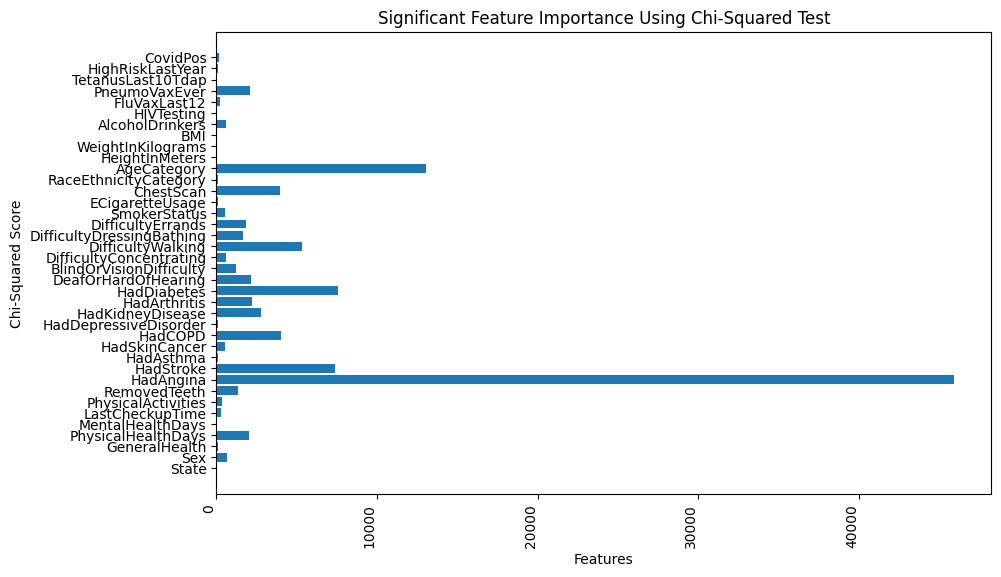

In [35]:
significant_features_chi = np.array(X_fs.columns)[p_values < 0.05]

X_significant = X_fs[significant_features_chi]

significant_chi_scores = chi_scores[p_values < 0.05]
significant_p_values = p_values[p_values < 0.05]

plt.figure(figsize=(10, 6))
plt.barh(significant_features_chi, significant_chi_scores, tick_label=significant_features_chi)
plt.xlabel('Features')
plt.ylabel('Chi-Squared Score')
plt.title('Significant Feature Importance Using Chi-Squared Test')
plt.xticks(rotation=90, ha="right")
plt.show()

**P-değeri, bir özelliğin etki derecesinin tesadüfen ortaya çıkma olasılığını gösterir. Küçük bir p-değeri, bu etkinin tesadüfen ortaya çıkma olasılığının düşük olduğunu ve özelliğin modelde gerçekten anlamlı olduğunu gösterir. Araştırdığımda genellikle P-değeri 0.05'ten küçük olanlar seçiliyormuş o yüzden özellik seçerken bu oranı kullandım. Daha sonra seçilen özelliklerin önemimi grafikleştirdim.**

In [36]:
len(significant_features_chi)

38

## **Veri Setini Bölme ve Dengesiz Veri Dağılımını Düzeltme**

In [37]:
X = df.drop(['HadHeartAttack'],axis=1)
y = df['HadHeartAttack']

**Veri setinin eğitim özellikleri X değişkenine hedef özelliğimide y değişkenine atadım.**

Text(0.5, 1.0, 'Class Distribution')

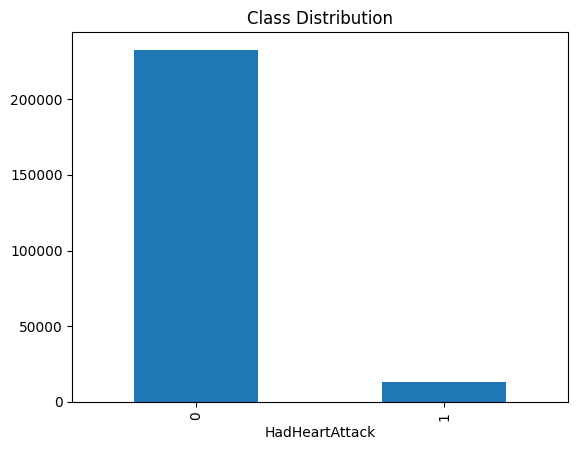

In [38]:
df['HadHeartAttack'].value_counts().plot(kind='bar')
plt.title('Class Distribution')

**Daha sonra hedef değişkenin sınıf dağılımına baktım dengesiz bir dağılım olduğu gözlemledim. Bunu düzelmek için iki farklı yöntem kullandım. Birisi under sampling diğeri ise over sampling. Aşağıda bunları nasıl uyguladığımı görebilirsiniz.**

### **Under Sampling**

**Under sampling, sınıf dağılımları eşit olana kadar çoğunluk olan sınıfının örneklerini ortadan kaldırarak veri kümesini yeniden dengelemeyi amaçlar. Bu projede random under sampling kullandım. Çoğunluk sınıfından rastgele örnekler kaldırılarak veri seti dengelenir.**

In [39]:
rus = RandomUnderSampler()
X_undersampled, y_undersampled = rus.fit_resample(X, y)

Text(0.5, 1.0, 'Sınıf dengesizliği düzeltmek için RandomUnderSampler kullanımı.')

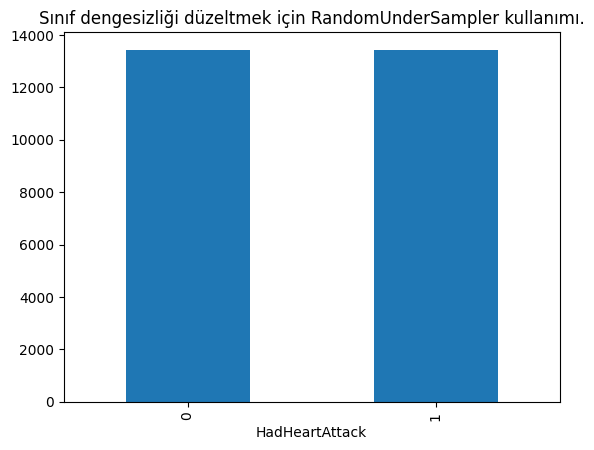

In [40]:
y_undersampled.value_counts().plot(kind='bar')
plt.title('Sınıf dengesizliği düzeltmek için RandomUnderSampler kullanımı.')

**Veri setinin dengelendiği görmek için bir bar grafiği kullandım.**

### **Over Sampling**

**Oversampling, azınlık sınıfındaki örneklerin sayısını çoğaltarak dengesizliği gidermeye çalışır. Bu yöntemde, azınlık sınıfındaki mevcut veriler tekrar tekrar kullanılır. SMOTE, azınlık sınıfına yeni sentetik veri noktaları ekleyerek aşırı örnekleme yapar. Ancak bu yeni veri noktaları, azınlık sınıfındaki mevcut örneklerin bir kopyası değildir. Bunun yerine, mevcut azınlık örnekleri arasında interpolasyon yaparak yeni veri noktaları üretir.**

In [41]:
smote = SMOTE(sampling_strategy='minority')
X_oversampled, y_oversampled = smote.fit_resample(X, y)

Text(0.5, 1.0, 'Sınıf dengesizliği düzeltmek için SMOTE kullanımı.')

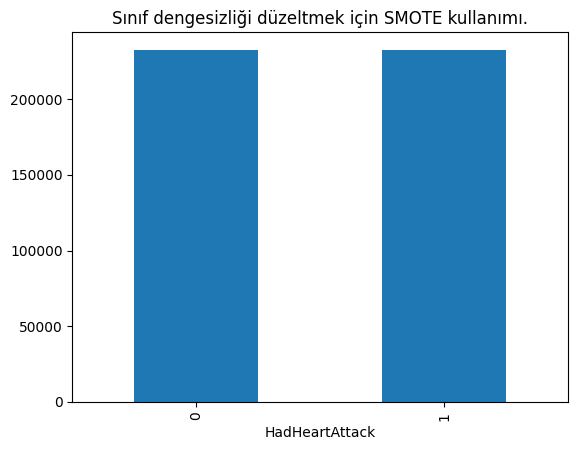

In [42]:
y_oversampled.value_counts().plot(kind='bar')
plt.title('Sınıf dengesizliği düzeltmek için SMOTE kullanımı.')

**Veri setinin dengelendiği görmek için bir bar grafiği kullandım.**

**Ki-Kare'ye göre seçinlen özelliklerin kullanılması ve veri setini eğitim ve test olarak ayrılması.**

In [43]:
X_chi_over = X_oversampled[significant_features_chi]
X_chi_under = X_undersampled[significant_features_chi]

In [44]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_chi_over, y_oversampled, test_size=0.3, random_state=42)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_chi_under, y_undersampled, test_size=0.3, random_state=42)

**Epitim ve test oranı 70 e 30 olarak belirledim veri sayısı fazla olduğu için.**

# Model Aşaması

## **Supervised Learning (Denetimli Öğrenme)**

### **Over Sampling yaptığım veri ile modelleme.**

**Burada 4 farklı sınıflandırma algoritmasını seçip bir dict değişkeninde tuttum. Daha sonra bu algoritmaları cross validation algoritması ile eğittim. Eğitirken cv değerini 5 seçtim.**

In [45]:
classifiers = {
    "Decision Tree Classifier" : DecisionTreeClassifier(),
    "XGBoost Classifier" : XGBClassifier(),
    "Random Forest Classifier" : RandomForestClassifier(),
    "KNN" : KNeighborsClassifier()
}

cv_results = {}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_over, y_train_over, cv=5, scoring='accuracy')
    cv_results[name] = scores
    print(f"{name} - Ortalama Doğruluk: {scores.mean():.4f} (+/- {scores.std():.4f})")

Decision Tree Classifier - Ortalama Doğruluk: 0.9222 (+/- 0.0009)
XGBoost Classifier - Ortalama Doğruluk: 0.9589 (+/- 0.0009)
Random Forest Classifier - Ortalama Doğruluk: 0.9461 (+/- 0.0011)
KNN - Ortalama Doğruluk: 0.8711 (+/- 0.0012)


**Cross Validationdan sonucu en başarılı model XGBoost Classifier olduğu görülmektedir. Şimdi bu model için hiperparametre optimizasyonu yapalım.**

#### **XGBoost Hiperparametre Optimizasyonu**

**XGBoost hiperparametre optimizasyonu için optuna kullandım. Optuna kullanma sebebim GridSearch'e göre daha hızlı çalışmasıydı veri seti büyük olduğu için süre gitgide uzuyordu. Hiperparametreler için değer aralıklarını verdim. XGBClassifier modelini oluşturdum. İkili sınıflandırma yaptığı için objective'ini binary:logistic seçtim. model.set_params ile early_stopping_rounds ekledim eğer 10 iterasyonda en iyi sonuç değişmez ise algoritmayı durduracak. Accuracy score'unu maximize etmeye çalışıyor. Eğitim verisi içinden bir doğrulama validation verisi ayırdım yine oranı 70'e 30 olacak şekilde. Daha sonra eğitime başladım ve en iyi parametreleri best_params değişkenine kaydettim.**

In [46]:
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 4, 10), #Karar ağacının maksimum derinliği. Daha büyük derinlik, daha karmaşık model.
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3), #Öğrenme oranı. Düşük değerler daha yavaş öğrenir, yüksek değerler hızlı ama riskli öğrenir.
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000), #Ağaç sayısı. Daha fazla ağaç, genellikle daha iyi performans.
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), #Yaprağın bölünmesi için gereken minimum örnek sayısı. Daha büyük değerler genelleştirmeyi artırır.
        'gamma': trial.suggest_float('gamma', 0.0001, 0.1), #Bölünme için gereken kayıp azaltımı. Daha yüksek değerler basitleştirilmiş model sağlar.   
        'subsample': trial.suggest_float('subsample', 0.6, 1.0), #Her ağaç için kullanılan veri oranı. Düşük değerler aşırı öğrenmeyi azaltır.
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0), #Her ağaç için kullanılan özelliklerin oranı. Aşırı öğrenmeyi kontrol eder.
        'alpha': trial.suggest_float('alpha', 0, 1), #L1 düzenleme ceza katsayısı. Daha yüksek değerler daha fazla özellik azaltır.
        'lambda': trial.suggest_float('lambda', 0, 1) #L2 düzenleme ceza katsayısı. Daha yüksek değerler modelin karmaşıklığını azaltır.
    }

    model = XGBClassifier(
        **param,
        objective='binary:logistic',  
        eval_metric='logloss',      
        random_state=42,
        n_jobs=-1
    )
    
    model.set_params(early_stopping_rounds=10)

    model.fit(X_train_over, y_train_over, eval_set=[(X_val_over, y_val_over)], verbose=False)
    y_pred = model.predict(X_val_over)

    accuracy = accuracy_score(y_val_over, y_pred)
    return 1 - accuracy

X_train_over, X_val_over, y_train_over, y_val_over = train_test_split(X_train_over, y_train_over, test_size=0.3, random_state=42)
 

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# En iyi hiperparametreler
print("En İyi Hiperparametreler:")
print(study.best_params)

best_params = study.best_params

[I 2024-09-19 11:15:08,510] A new study created in memory with name: no-name-eb4b794c-7cc3-4c52-9a86-f2948bfca1c9
[I 2024-09-19 11:15:19,840] Trial 0 finished with value: 0.03771228515565017 and parameters: {'max_depth': 10, 'learning_rate': 0.1366665269628849, 'n_estimators': 152, 'min_child_weight': 9, 'gamma': 0.05761365644188807, 'subsample': 0.909947670763924, 'colsample_bytree': 0.7494591804405356, 'alpha': 0.4984470749836971, 'lambda': 0.8420225544508689}. Best is trial 0 with value: 0.03771228515565017.
[I 2024-09-19 11:15:49,230] Trial 1 finished with value: 0.03716973599353035 and parameters: {'max_depth': 6, 'learning_rate': 0.1963456908352966, 'n_estimators': 747, 'min_child_weight': 1, 'gamma': 0.04419064179148092, 'subsample': 0.7337938381302627, 'colsample_bytree': 0.711242476616506, 'alpha': 0.8045940675404205, 'lambda': 0.38228359377668053}. Best is trial 1 with value: 0.03716973599353035.
[I 2024-09-19 11:15:59,421] Trial 2 finished with value: 0.04058881939254966 and

En İyi Hiperparametreler:
{'max_depth': 10, 'learning_rate': 0.0666686580912925, 'n_estimators': 942, 'min_child_weight': 5, 'gamma': 0.07391624460377955, 'subsample': 0.7232256683884288, 'colsample_bytree': 0.9612784220776687, 'alpha': 0.07832742854477769, 'lambda': 0.918816622191172}


**En iyi parametreler ile modeli eğittim. Eğitirken yine validation kullandım. Daha sonra test verisi ile eğittiğim modele tahminleme yaptırdım. report değişkenine classification_report'tan çıkan sonuçları kaydedip yazdırdım.**

In [47]:
best_model = XGBClassifier(
    **best_params,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

best_model.fit(X_train_over, y_train_over, eval_set=[(X_val_over, y_val_over)], verbose=False)

y_test_pred = best_model.predict(X_test_over)

report = classification_report(y_test_over, y_test_pred)

print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     69906
           1       0.98      0.95      0.97     69647

    accuracy                           0.97    139553
   macro avg       0.97      0.97      0.97    139553
weighted avg       0.97      0.97      0.97    139553



**Burada da karmaşıklık matrisini confusion_matrix metodu ile buldum ve görselleştirmesini yaptım.**

Text(0.5, 36.72222222222221, 'Tahmin Edilen Değerler')

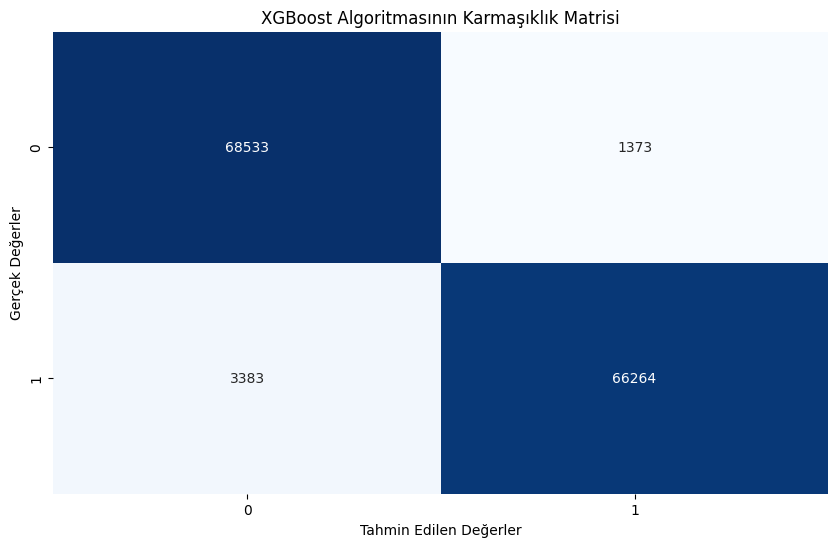

In [48]:
conf_matrix = confusion_matrix(y_test_over, y_test_pred)

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', cbar=False)
plt.title('XGBoost Algoritmasının Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')

### **Under Sampling yaptığım veri ile modelleme**

**Over samplingte kullandığım modelleri bu sefer under sampling yaptığım veri ile cross validation yaptım.**

In [49]:
cv_results_under = {}

for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train_under, y_train_under, cv=5, scoring='accuracy')
    cv_results_under[name] = scores
    print(f"{name} - Ortalama Doğruluk: {scores.mean():.4f} (+/- {scores.std():.4f})")

Decision Tree Classifier - Ortalama Doğruluk: 0.7215 (+/- 0.0036)
XGBoost Classifier - Ortalama Doğruluk: 0.7956 (+/- 0.0062)
Random Forest Classifier - Ortalama Doğruluk: 0.7971 (+/- 0.0033)
KNN - Ortalama Doğruluk: 0.7188 (+/- 0.0078)


**Cross Validationdan sonucu en başarılı model Random Forest Classifier olduğu görülmektedir. Şimdi bu model için hiperparametre optimizasyonu yapalım.**

**Random Forest'ın parametrelerini optimize etmek için randomizedsearch kullandım. GridSearch yine uzun sürdüğü için randomizedsearch kullanmaya karar verdim.**

In [50]:
rf = RandomForestClassifier(random_state=42)

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=50, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train_under, y_train_under)

print("En İyi Hiperparametreler:")
print(random_search.best_params_)
print("En İyi Doğruluk:")
print(random_search.best_score_)

En İyi Hiperparametreler:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 576}
En İyi Doğruluk:
0.8028072448167989


**En iyi parametreler ile modeli eğittim. Daha sonra test verisi ile eğittiğim modele tahminleme yaptırdım. report değişkenine classification_report'tan çıkan sonuçları kaydedip yazdırdım.**

In [51]:
best_rf = random_search.best_estimator_

y_test_pred_rf = best_rf.predict(X_test_under)

report = classification_report(y_test_under, y_test_pred_rf)

print(report)

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      4018
           1       0.80      0.79      0.79      4043

    accuracy                           0.80      8061
   macro avg       0.80      0.80      0.80      8061
weighted avg       0.80      0.80      0.80      8061



**Burada da karmaşıklık matrisini confusion_matrix metodu ile buldum ve görselleştirmesini yaptım.**


Text(0.5, 36.72222222222221, 'Tahmin Edilen Değerler')

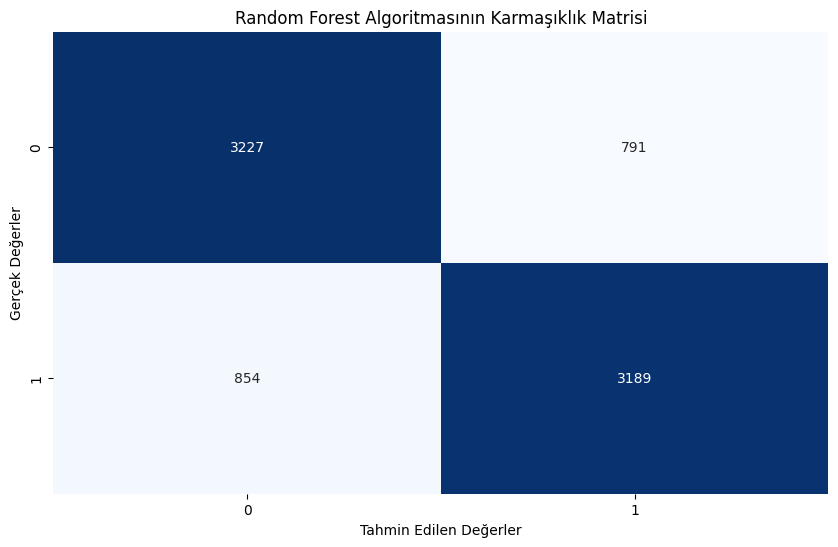

In [52]:
conf_matrix = confusion_matrix(y_test_under, y_test_pred_rf)

plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d',cmap='Blues', cbar=False)
plt.title('Random Forest Algoritmasının Karmaşıklık Matrisi')
plt.ylabel('Gerçek Değerler')
plt.xlabel('Tahmin Edilen Değerler')

**İki modelin sonuçları karşılaştırıldığında Over sampling yapılmış veri ile daha iyi sonuç verdiğini gözlemlemekteyiz.**

## **Unsupervised Learning (Denetimsiz Öğrenme)**

**Denetimsiz öğrenme için iki farklı model kullandım. Bunlardan biri Gaussian Mixture diğeri ise K-means modeli oldu. Modelleme yaparken burada Süreleri uzun sürdüğü için normal veri setini ve under sampling yapılan veri setini kullandım.**

### **Normal Veri ile Modelleme**

#### **Elbow Method**

**K-means algoritmasında n_clusters değerini belirlemek için elbow methodunu kullandım.**

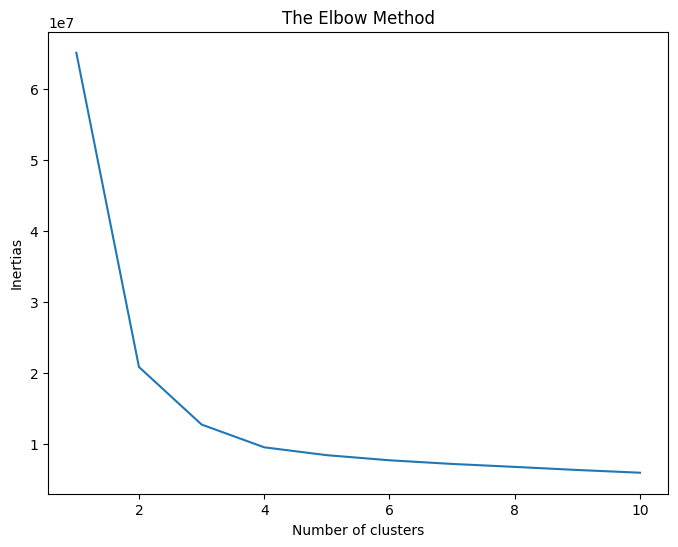

In [53]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

**Elbow metodundan çıkan sonuç ile küme sayısını 2 olarak belirleyebiliriz. 2'den sonra inertia değerini azalma oranı düşüyor.**

### **K-Means ile Modelleme**

**K-means ile modellerken elbow metodundan dolayı n_clusters değişkeninin değerini 2 yaptım. Eğitim ve test noktaları oluşturdum. Eğitim noktaları ile eğittim test noktalarını tahminledim. Test veri setindeki ilk iki özelliği xs ve ys. Bu iki özellik, noktaların grafikte x ve y ekseninde konumlanmasını sağlar. Daha sonra noktaları scatter plot üzerinde görselleştiriyorum. Ayrıcıa merkez noktalarıda ekliyorum.**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


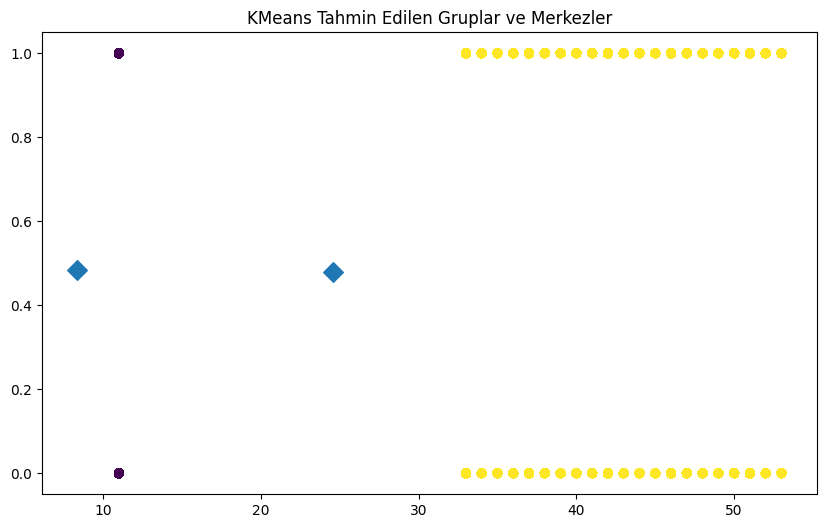

In [54]:
model = KMeans(n_clusters=2)
training_points = X[:150000]
test_points = X[150000:]
model.fit(training_points)
labels = model.predict(test_points)

xs = test_points.iloc[:, 0]
ys = test_points.iloc[:, 1]

plt.figure(figsize=(10,6))
plt.scatter(xs, ys, c=labels, alpha=0.5)
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.title("KMeans Tahmin Edilen Gruplar ve Merkezler")
plt.scatter(centroids_x, centroids_y, marker='D',s=100)
plt.show()

#### **PCA ile özellik seçimi**

**PCA yöntemini kullanıp özelliklerin öneminin grafiğini çıkartıyorum.**

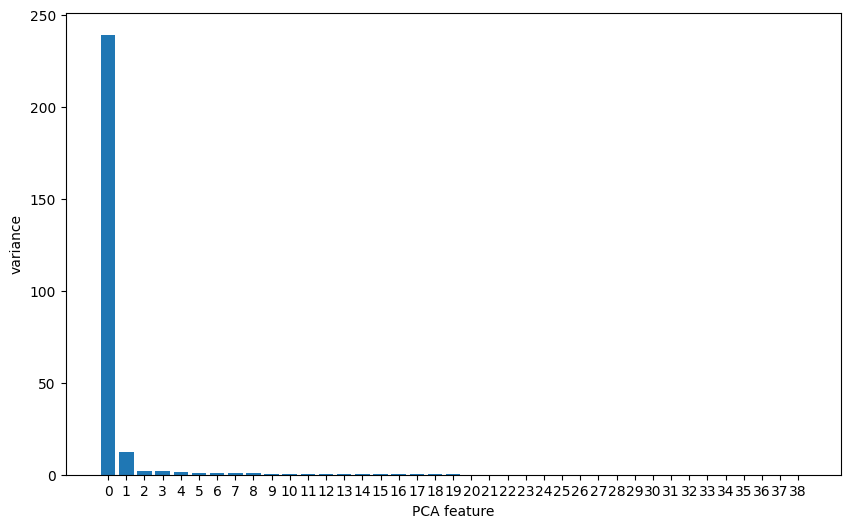

In [55]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.figure(figsize=(10,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

**Grafik sonucu ilk 2 özelliğin daha çok etki ettiğini görüyorum ve n_components değerini 2 olarak seçiyorum.**

**Burada da pca ile veri setimi dönüştürüyorum. Dönüştürdüğüm veri seti ile tekrar eğitim yapıp tahminleme yaptırıyorum. Yukardaki benzer bir şekilde görselleştirme yapıyorum scatter plot üzerinde.**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


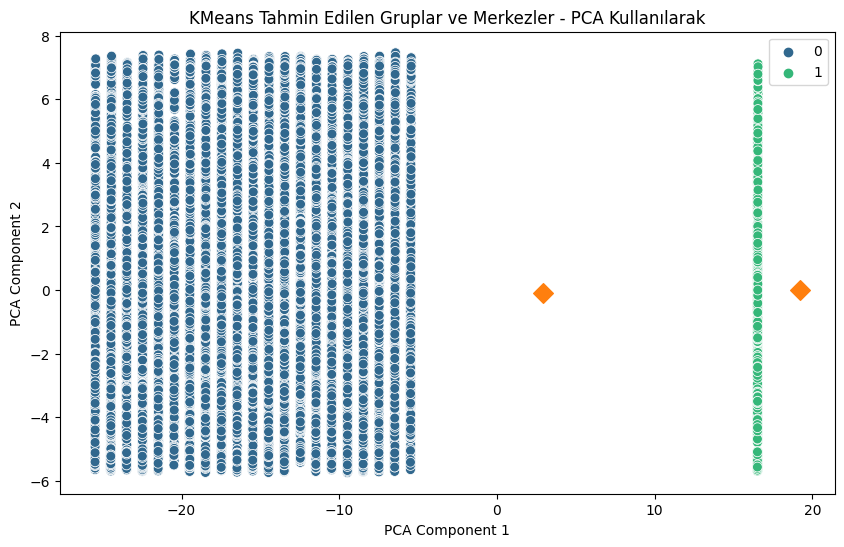

In [56]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

model = KMeans(n_clusters=2)
training_points = X_pca[:150000]
test_points = X_pca[150000:]
model.fit(training_points)
labels = model.predict(test_points)

test_points_2d = test_points[:, :2]  
centers_pca = model.cluster_centers_


plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_points_2d[:, 0], y=test_points_2d[:, 1], hue=labels, palette="viridis", s=50)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=100, marker='D', label='Centroids')
plt.title("KMeans Tahmin Edilen Gruplar ve Merkezler - PCA Kullanılarak")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

### **Gaussian Mixture ile Modelleme**

**Gaussian Mixture Model (GMM) kullanarak bir veri kümesi üzerinde iki bileşenle kümeleme (clustering) gerçekleştirdim. İlk olarak, GMM iki küme için veriyi sınıflandırır ve her gözleme bir etiket (label) atar. Ardından, her kümenin merkez noktaları (centroids) belirlenir. Verinin ilk iki özelliği seçilir ve bu iki özellik üzerinden bir scatter plot oluşturulur.**

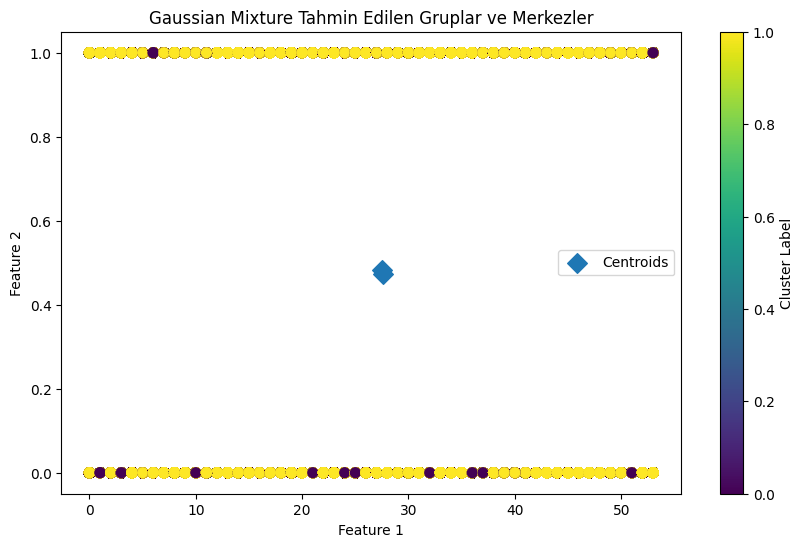

In [57]:
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X)
centers = gmm.means_

X_2D = X.iloc[:, :2]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', s=100, label='Centroids')
plt.title('Gaussian Mixture Tahmin Edilen Gruplar ve Merkezler')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.show()


**Veri kümesindeki özellikleri iki ana bileşene (principal components) indirgemek için Principal Component Analysis (PCA) kullandım. İlk olarak, PCA uygulayarak veriyi iki boyutlu bir uzaya dönüştürürdüm. Daha sonra, bu iki boyutlu veriyi iki küme ile sınıflandırmak için Gaussian Mixture Model (GMM) uyguladım ve her gözleme bir etiket atar. Kümelerin merkezleri de belirledim. Son olarak, PCA ile indirgenmiş verinin scatter plot'u oluşturdum; veriler, tahmin edilen kümelere göre renklendirildi ve kümelerin merkezleri farklı bir sembolle gösterildi.**

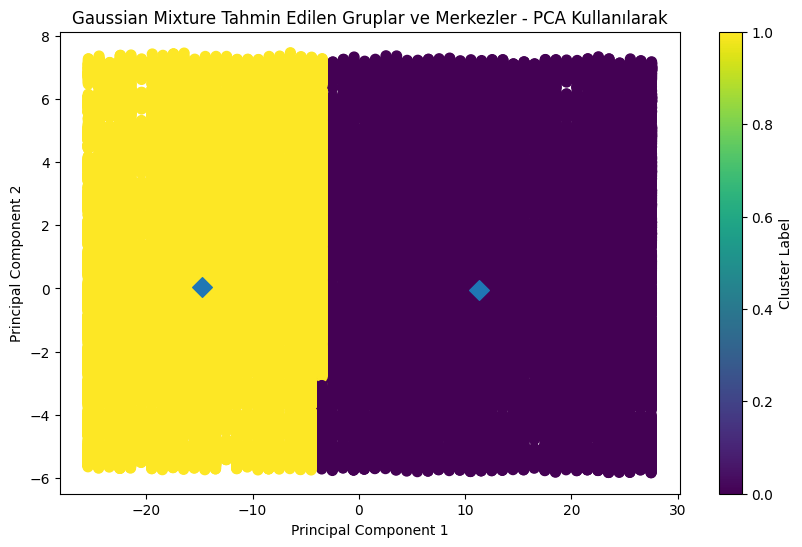

In [58]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X_pca)
centers = gmm.means_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', s=100, label='Centroids')
plt.title('Gaussian Mixture Tahmin Edilen Gruplar ve Merkezler - PCA Kullanılarak')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

### **Under Sampling Yapılmış Veri İle Modelleme**

**Burada da yine yukarıda yapılan işlemlere benzer işlemler yapılmıştır sadece veri seti olarak Under sampling yapılmış veri ile çalışılmıştır. Onun dışında bir farkı yoktur o yüzden kodları tekrar açıklamayacağım.**

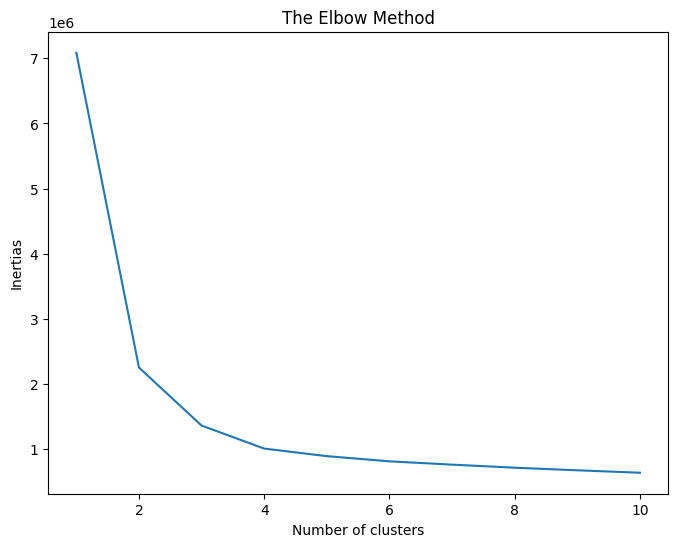

In [59]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_undersampled)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

#### **Silhouette Score**

**Silhouette Skoru, bir örneğin kendi kümesindeki diğer örneklerle olan benzerliği ile en yakın komşu kümesindeki örneklerle olan benzerliğini karşılaştırarak kümelerin içsel tutarlılığını ve ayrımını ölçen bir metriktir.** 

**Farklı küme sayıları için K-Means algoritmasını uygulayarak ve her bir küme sayısı için Silhouette Skoru hesaplayarak en uygun küme sayısını belirlemeye yönelik bir işlemi gerçekleştirmektedir. Matplotlib kütüphanesi kullanılarak, küme sayıları (x ekseni) ve karşılık gelen Silhouette Skorları (y ekseni) bir çizgi grafiği şeklinde görselleştirilir.**

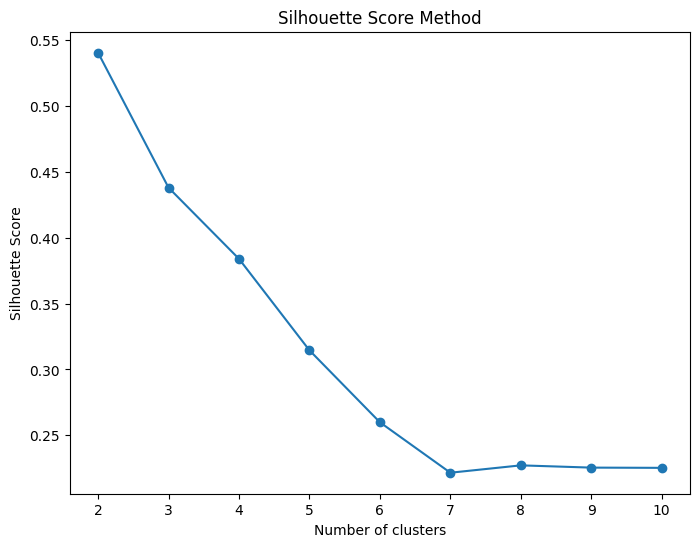

In [60]:
silhouette_scores = []

for i in range(2, 11):  # Silhouette skoru hesaplamak için en az 2 kümeye ihtiyaç var
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X_undersampled)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_undersampled, labels)
    silhouette_scores.append(silhouette_avg)

f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


**Silhouette ve Elbow grafiklerini incelediğimde n_clusters değeri için 2 seçmek daha uygun olduğunu düşündüm.**

### **K-Means ile Modelleme**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


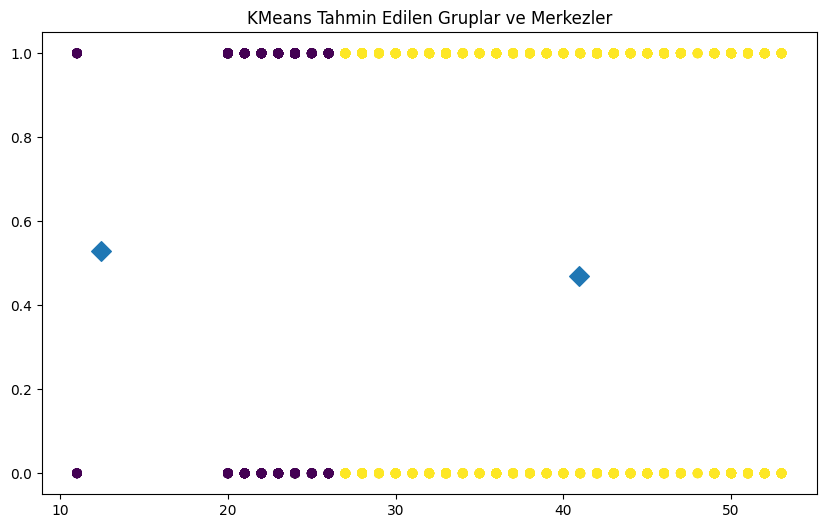

In [61]:
model = KMeans(n_clusters=2)
training_points = X_undersampled[:18000]
test_points = X_undersampled[18000:]
model.fit(training_points)
labels = model.predict(test_points)

xs = test_points.iloc[:, 0]
ys = test_points.iloc[:, 1]

plt.figure(figsize=(10,6))
plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.title("KMeans Tahmin Edilen Gruplar ve Merkezler")
plt.scatter(centroids_x, centroids_y, marker='D',s=100)
plt.show()

### **PCA ile Özellik Seçimi**

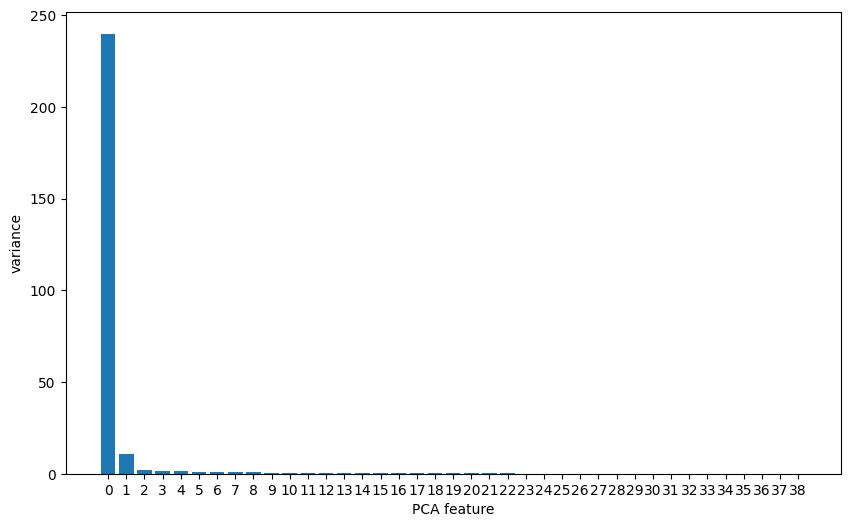

In [62]:
pca = PCA()
pca.fit(X_undersampled)

features = range(pca.n_components_)
plt.figure(figsize=(10,6))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


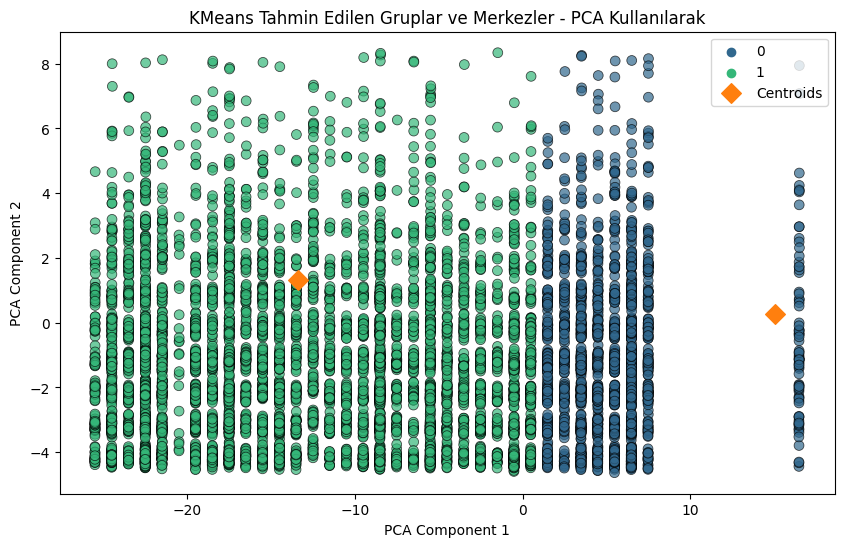

In [63]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_undersampled)

model = KMeans(n_clusters=2)
training_points = X_pca[:18000]
test_points = X_pca[18000:]
model.fit(training_points)

labels = model.predict(test_points)
centers_pca = model.cluster_centers_

plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_points[:, 0], y=test_points[:, 1], hue=labels, palette="viridis", s=50, marker='o', edgecolor='k', alpha=0.7)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], s=100, marker='D', label='Centroids')
plt.title("KMeans Tahmin Edilen Gruplar ve Merkezler - PCA Kullanılarak")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### **Gaussian Mixture**

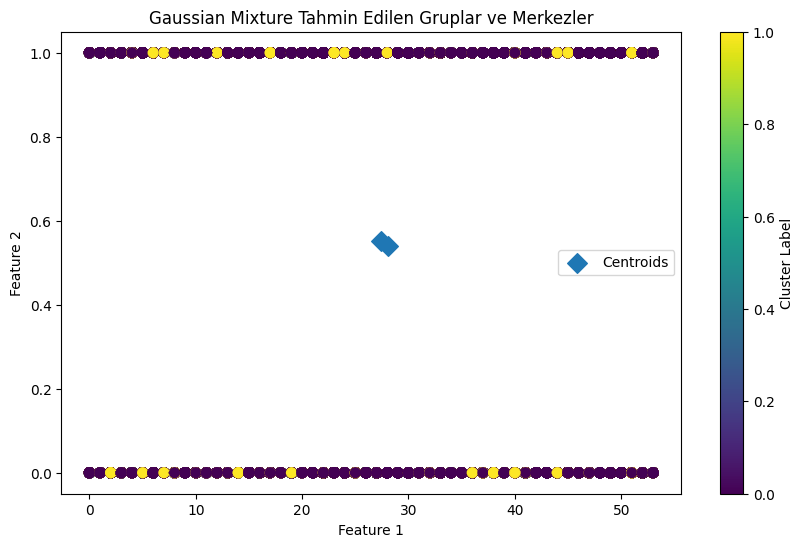

In [64]:
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X_undersampled)
centers = gmm.means_

X_2D = X_undersampled.iloc[:, :2]

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_2D.iloc[:, 0], X_2D.iloc[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', s=100, label='Centroids')
plt.title('Gaussian Mixture Tahmin Edilen Gruplar ve Merkezler')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(scatter, label='Cluster Label')
plt.legend()
plt.show()



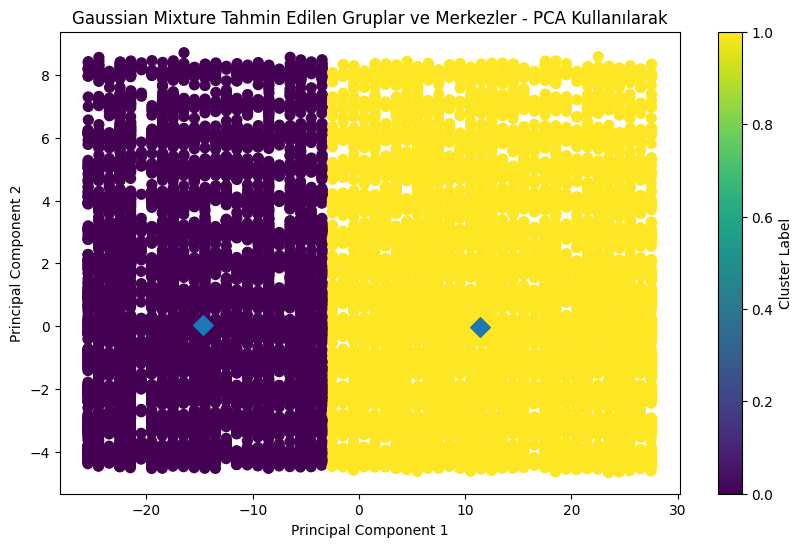

In [65]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_undersampled)

gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X_pca)
centers = gmm.means_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', s=100, label='Centroids')
plt.title('Gaussian Mixture Tahmin Edilen Gruplar ve Merkezler - PCA Kullanılarak')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.show()